<div class="alert alert-block alert-info">
    
Result of the work is shortly summarized in following links 
    
    Presentation: https://drive.google.com/file/d/1fn7M03DLFH-e5QGLQc0byXerfVM9qhFs/view?usp=sharing
    
    Dashboard: https://public.tableau.com/app/profile/eduard.ochirov/viz/SpaceBrothers_16222052077950/Dashboard1
    
 
</div>

# Анализ пользовательского поведения в игре "Космические братья"

Цель: Провести анализ пользовательского поведения игроков внутри игры до внедрения систем монетизации. 

Objective: Analyze player behavior before integrating monetization system

### **Описание датасетов:**

Основной датасет содержит данные о событиях, совершенных в мобильной игре «Космические братья». В ней пользователи строят свою космическую программу и пытаются преуспеть в деле колонизации галактики.

Основная монетизация игры — только планируется. Но предполагается, что в приложении будет происходить показ рекламы на экране с выбором типа объекта для постройки.

В датасете представлены данные по игре пользователей на первом уровне. Завершение первого уровня требует от игрока выполнения одного из двух условий:

- Победа над первым врагом

- Реализация проекта
В датасете содержатся данные первых пользователей приложения — когорты пользователей, которые начали пользоваться приложением в период с 4 по 10 мая включительно.

Датасет *game_actions.csv*:

- `event_datetime` — время события;
- `event` — одно из трёх событий:
    1. `building` — объект построен,
    2. `finished_stage_1` — первый уровень завершён,
    3. `project` — проект завершён;
- `building_type` — один из трёх типов здания:
    1. `assembly_shop` — сборочный цех,
    2. `spaceport` — космопорт,
    3. `research_center` — исследовательский центр;
- `user_id` — идентификатор пользователя;
- `project_type` — тип реализованного проекта;



Датасет *ad_cost.csv*:

- `day` - день, в который был совершен клик по объявлению
- `source` - источник трафика
- `cost` - стоимость кликов

Датасет user_source.csv содержит колонки:

- `user_id` - идентификатор пользователя
- `source` - источников, с которого пришёл пользователь, установивший приложение


## Декомпозиция / Decomposition 

Структура работы будет выглядеть следующим образом / Structure of the study looks as follows

**Изучение датасетов** / **Exploring datasets**

- Первичное ознакомление с данными методом head() / initial learning about data

**Предобработка данных** 

- Изучение типов данных / приведение к нужным типам / examination of data types
- Проверка пропусков / Missings check-up
- Проверка дубликатов / Duplicates check-up
- Проверка неявных дубликатов / Latent duplicates check-up
- Выявление аномалий / Finding anomalies 
- Выводы / Conclusion

**EDA**
- Выявить количество игроков, выбравших тот инли иной путь прохождения / Determine players with different play strategies
- Выявить среднее время, затраченное на прохождение уровня у игроков с разными стратегиями / Find average time spent on finishing the level depending on the strategy 
- Определить среднее количество построек каждого типа у игроков с разными стратегиями / Find average buildings count depending on the strategy
- Для игроков, выбравших проект, определить среднее время с момента постройки исследовательского центра до завершения проекта / Find average time between building a research center and finished project for research strategy. 
- Изучить куммулятивные затраты на привлечение в разбивке на источники / Find cummulative ad costs for different sources 
- Изучить средние затраты на привлечение в разбивке на источники / Find average costs of each source
- Рассчитать средний САС по источникам / Find average CAC for different sources 
- Рассчитать САС в разбивке по дням и источниками / Find CAC for different sources for a time period 
- Выводы / Conclusions 

**Задача 1** / **Task 1**
- Определить поведенческие паттерны игроков с разными стратегиями в разбивке по источнику прихода( т.е. для каждого источника проанализировать поведение каждой из стратегий,т.е. повторить шаги EDA анализа) / Define behevioral patterns of players with different play styles 
- Выводы, интерпретация / Conclusions

**Задача 2** / **Task 2**
- Сравнить статистическим критерием среднее время прохождение уровня у разных стратегий / Test average time spent to finish a level for different strategies 
- Выводы, интерпретация / Conclusions 

**Задача 3 / Task 3**
- Предположение: Доля тех, кто выбирает убийство игрока, отличается между группами игроков привлеченными с разных источников
Сравнить z-критерием доли игрокок, выбравших сценарий убийства другого игрока, в группах, привлеченных черех через каждый из источников / Test proportions of researches for different sources 
- Выводы, интерпретация / Conclusions 

**Общие выводы по исследованию** / **Main conclusions** 
- Описание ключевых находок (findings) / Describe main findings 
- Рекомендации к осуществлению монетизации игры / Recommendations to enable monetization system 

**Презентация по основным результатам** / **Presentation**
- Краткое описание выводов с исслюстрацией по каждой задаче / Presentation of each task with illustration 


**Дашборд** / **Dashboard**
- Количество игровых действий по источнику по дням
- Доли игроков по источнику по дням
- Retention Rate по источникам по дням
- CAC по источникам по дням 
 

In [1]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import ttest_ind, mannwhitneyu, levene, shapiro
from statsmodels.stats.proportion import proportions_ztest
import warnings 

In [2]:
warnings.simplefilter("ignore")

In [3]:
pip install --upgrade scipy

Requirement already up-to-date: scipy in c:\users\eddie\anaconda3\lib\site-packages (1.6.3)
Note: you may need to restart the kernel to use updated packages.


## Изучения датасетов / Exploring datasets 

In [4]:
try :
    game_actions = pd.read_csv('/datasets/game_actions.csv')
    ad_costs = pd.read_csv('/datasets/ad_costs.csv')
    user_source = pd.read_csv('/datasets/user_source.csv')
except: 
    game_actions = pd.read_csv('game_actions.csv')
    ad_costs = pd.read_csv('ad_costs.csv')
    user_source = pd.read_csv('user_source.csv')

In [5]:
game_actions.head()

,event_datetime,event,building_type,user_id,project_type
0,5/4/2020 0:00,building,assembly_shop,55e92310-cb8e-4754-b622-597e124b03de,NaN
1,5/4/2020 0:00,building,assembly_shop,c07b1c10-f477-44dc-81dc-ec82254b1347,NaN
2,5/4/2020 0:00,building,assembly_shop,6edd42cc-e753-4ff6-a947-2107cd560710,NaN
3,5/4/2020 0:00,building,assembly_shop,92c69003-d60a-444a-827f-8cc51bf6bf4c,NaN
4,5/4/2020 0:00,building,assembly_shop,cdc6bb92-0ccb-4490-9866-ef142f09139d,NaN


In [6]:
ad_costs.head()

,source,day,cost
0,facebook_ads,2020-05-03,935.882786
1,facebook_ads,2020-05-04,548.354480
2,facebook_ads,2020-05-05,260.185754
3,facebook_ads,2020-05-06,177.982200
4,facebook_ads,2020-05-07,111.766796


In [7]:
user_source.head()

,user_id,source
0,0001f83c-c6ac-4621-b7f0-8a28b283ac30,facebook_ads
1,00151b4f-ba38-44a8-a650-d7cf130a0105,yandex_direct
2,001aaea6-3d14-43f1-8ca8-7f48820f17aa,youtube_channel_reklama
3,001d39dc-366c-4021-9604-6a3b9ff01e25,instagram_new_adverts
4,002f508f-67b6-479f-814b-b05f00d4e995,facebook_ads


## Предобработка данных / Preparation of data 

### Game Actions

В рамках данного блока мы будем оценивать качество данных и выявлять аномалии 

In this block we will evaluate quality of the dataset and search for anomalies 

In [8]:
game_actions.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 135640 entries, 0 to 135639
Data columns (total 5 columns):
 #   Column          Non-Null Count   Dtype 
---  ------          --------------   ----- 
 0   event_datetime  135640 non-null  object
 1   event           135640 non-null  object
 2   building_type   127957 non-null  object
 3   user_id         135640 non-null  object
 4   project_type    1866 non-null    object
dtypes: object(5)
memory usage: 5.2+ MB


In [9]:
game_actions['event_datetime'] = pd.to_datetime(game_actions['event_datetime'])

In [10]:
game_actions[game_actions['building_type'].isna()]['event'].value_counts()
# данные пропуски имеют вполне легитимный статус, т.к. привязаны к другому событию
# these missings are quite legit as they indicate attachment to a different event

finished_stage_1    5817
project             1866
Name: event, dtype: int64

In [11]:
game_actions.duplicated().sum()

18

In [12]:
game_actions = game_actions.drop_duplicates()

Избавимся от дубликатов / let's remove duplicates

In [13]:
game_actions.event.unique()

array(['building', 'finished_stage_1', 'project'], dtype=object)

In [14]:
game_actions.building_type.unique()

array(['assembly_shop', 'spaceport', nan, 'research_center'], dtype=object)

In [15]:
game_actions.project_type.unique()

array([nan, 'satellite_orbital_assembly'], dtype=object)

В неявных пропусках вроде тоже все впорядке/ everything seems to be fine with unobvious duplicates

In [16]:
game_actions.event_datetime.min()

Timestamp('2020-05-04 00:00:00')

In [17]:
game_actions.event_datetime.max()

Timestamp('2020-06-05 12:32:00')

Последнее действие было соверешено 5 июня 

Last event occured on 5th of June

In [18]:
game_actions['date'] = game_actions['event_datetime'].astype('datetime64[D]') 

In [19]:
game_actions.head()

,event_datetime,event,building_type,user_id,project_type,date
0,2020-05-04,building,assembly_shop,55e92310-cb8e-4754-b622-597e124b03de,NaN,2020-05-04
1,2020-05-04,building,assembly_shop,c07b1c10-f477-44dc-81dc-ec82254b1347,NaN,2020-05-04
2,2020-05-04,building,assembly_shop,6edd42cc-e753-4ff6-a947-2107cd560710,NaN,2020-05-04
3,2020-05-04,building,assembly_shop,92c69003-d60a-444a-827f-8cc51bf6bf4c,NaN,2020-05-04
4,2020-05-04,building,assembly_shop,cdc6bb92-0ccb-4490-9866-ef142f09139d,NaN,2020-05-04


## Ad Costs 

In [20]:
ad_costs.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 28 entries, 0 to 27
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   source  28 non-null     object 
 1   day     28 non-null     object 
 2   cost    28 non-null     float64
dtypes: float64(1), object(2)
memory usage: 800.0+ bytes


In [21]:
ad_costs.duplicated().sum()

0

In [22]:
ad_costs.source.unique()

array(['facebook_ads', 'instagram_new_adverts', 'yandex_direct',
       'youtube_channel_reklama'], dtype=object)

In [23]:
ad_costs.cost.min()

23.314669267402746

In [24]:
ad_costs.cost.max()

969.1393939421927

In [25]:
ad_costs.head()

,source,day,cost
0,facebook_ads,2020-05-03,935.882786
1,facebook_ads,2020-05-04,548.354480
2,facebook_ads,2020-05-05,260.185754
3,facebook_ads,2020-05-06,177.982200
4,facebook_ads,2020-05-07,111.766796


Затраты на привлечения отслеживаются за день, до среза по когорте, т.е. бюджет за текущий день закладывается на игроков привлеченных на следующий день.

Costs for acquisition are monitored the day before the query for cohort is done

## User Source

In [26]:
user_source.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13576 entries, 0 to 13575
Data columns (total 2 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   user_id  13576 non-null  object
 1   source   13576 non-null  object
dtypes: object(2)
memory usage: 212.2+ KB


In [27]:
game_actions['user_id'].nunique() == len(user_source)
#убедимся, что у каждого игрока есть свой источник 
#make sure that every player has a source

True

In [28]:
user_source.source.unique()

array(['facebook_ads', 'yandex_direct', 'youtube_channel_reklama',
       'instagram_new_adverts'], dtype=object)

На данном этапе предлагаю остановить предобработку данных и перейти к основному анализу

I suggest that we stop preparation of data and move towards main analysis

Прежде чем делать какие-либо преположения я планирую провести исследовательский анализ данных 

Before we start solving tasks, I would like to run EDA in order to find out what data we handle 

## preEDA 

In [29]:
game_actions.user_id.nunique() 
#кол-во кникальных игроков 
#number of unique players 

13576

In [30]:
game_actions.project_type.value_counts()

satellite_orbital_assembly    1866
Name: project_type, dtype: int64

In [31]:
game_actions.building_type.value_counts()

spaceport          59318
assembly_shop      54485
research_center    14136
Name: building_type, dtype: int64

In [32]:
game_actions.event.value_counts()

building            127939
finished_stage_1      5817
project               1866
Name: event, dtype: int64

In [33]:
game_actions['building_type'].value_counts() / game_actions.groupby('building_type')['user_id'].nunique()
#среднее количество построек на одного игрока
#average number of buildings of each type per player 

assembly_shop      4.013332
research_center    1.842785
spaceport          4.483259
dtype: float64

In [34]:
researchers = game_actions[game_actions['event']=='project']

In [35]:
researchers

,event_datetime,event,building_type,user_id,project_type,date
47121,2020-05-08 18:10:00,project,NaN,e3c66498-9d45-4000-9392-f81e6796e7da,satellite_orbital_assembly,2020-05-08
57398,2020-05-09 13:49:00,project,NaN,936e7af6-8338-4703-a1df-fc6c3f5b8e34,satellite_orbital_assembly,2020-05-09
58797,2020-05-09 16:19:00,project,NaN,a4491c86-c498-4f74-a56e-65c136d0e9a1,satellite_orbital_assembly,2020-05-09
61174,2020-05-09 20:29:00,project,NaN,85d9e675-562b-4329-8bbd-14d3b39096be,satellite_orbital_assembly,2020-05-09
63770,2020-05-10 00:57:00,project,NaN,1889ca71-3c57-4e61-9ea6-a711971bbf0a,satellite_orbital_assembly,2020-05-10
...,...,...,...,...,...,...
135602,2020-06-02 03:04:00,project,NaN,9d98001c-7e14-40d7-896e-46b3047365fd,satellite_orbital_assembly,2020-06-02
135603,2020-06-02 06:21:00,project,NaN,df4a1e13-eba9-4928-a7cf-ee303d6f80f9,satellite_orbital_assembly,2020-06-02
135609,2020-06-02 17:17:00,project,NaN,82e46f34-e243-4728-8e20-2e171fc33ea4,satellite_orbital_assembly,2020-06-02
135617,2020-06-03 09:46:00,project,NaN,fe032991-71e0-48c5-889f-4c3805ba4c9b,satellite_orbital_assembly,2020-06-03


Теперь я хочу сохранить тех игроков, которые выполнили постройку того или иного здания, чтобы проверить предположение, что для выполнения проекта нужно построить все 3 здания

I want to extract ids that built a specific building to find out if building of each one of them is required to accomplish the project 

In [36]:
research = game_actions[game_actions['building_type']=='research_center']

In [37]:
spaceport = game_actions[game_actions['building_type']=='spaceport']

In [38]:
assembly = game_actions[game_actions['building_type']=='assembly_shop']

In [39]:
researchers[researchers['user_id'].isin(spaceport['user_id'])]['user_id'].nunique()

1866

In [40]:
researchers[researchers['user_id'].isin(research['user_id'])]['user_id'].nunique()

1866

In [41]:
researchers[researchers['user_id'].isin(assembly['user_id'])]['user_id'].nunique()

1866

Из этого можно сделать вывод, что мое предположения подтвердилось 

Based on that my assumption is confirmed


In [42]:
#researchers = game_actions[game_actions['event']=='project']
#те, кто завершили проект
#those who accomplished the project

In [43]:
killers = game_actions[game_actions['event']=='finished_stage_1'] 
# те, кто убили игрока (?)
# those who killed a player? 

In [44]:
researchers[researchers['user_id'].isin(killers['user_id'])] 
# пересечение, есть такие, кто убил и завершил проект?

,event_datetime,event,building_type,user_id,project_type,date
47121,2020-05-08 18:10:00,project,NaN,e3c66498-9d45-4000-9392-f81e6796e7da,satellite_orbital_assembly,2020-05-08
57398,2020-05-09 13:49:00,project,NaN,936e7af6-8338-4703-a1df-fc6c3f5b8e34,satellite_orbital_assembly,2020-05-09
58797,2020-05-09 16:19:00,project,NaN,a4491c86-c498-4f74-a56e-65c136d0e9a1,satellite_orbital_assembly,2020-05-09
61174,2020-05-09 20:29:00,project,NaN,85d9e675-562b-4329-8bbd-14d3b39096be,satellite_orbital_assembly,2020-05-09
63770,2020-05-10 00:57:00,project,NaN,1889ca71-3c57-4e61-9ea6-a711971bbf0a,satellite_orbital_assembly,2020-05-10
...,...,...,...,...,...,...
135602,2020-06-02 03:04:00,project,NaN,9d98001c-7e14-40d7-896e-46b3047365fd,satellite_orbital_assembly,2020-06-02
135603,2020-06-02 06:21:00,project,NaN,df4a1e13-eba9-4928-a7cf-ee303d6f80f9,satellite_orbital_assembly,2020-06-02
135609,2020-06-02 17:17:00,project,NaN,82e46f34-e243-4728-8e20-2e171fc33ea4,satellite_orbital_assembly,2020-06-02
135617,2020-06-03 09:46:00,project,NaN,fe032991-71e0-48c5-889f-4c3805ba4c9b,satellite_orbital_assembly,2020-06-03


Исходя из этого у меня складыватся впечатление, что ивент finished_stage_1 регистрирует всех, кто прошел 1 уровент, т.е. среди них затерялись те, кто убил другого игрока 

Based on this info, I can assume that finished_stage_1 contains everyone who completed the stage regardless of the strategy

In [45]:
game_actions.groupby(['user_id', 'event'])[['event_datetime','building_type']].min()

event_datetime  \
user_id                              event                                  
0001f83c-c6ac-4621-b7f0-8a28b283ac30 building         2020-05-06 01:07:00   
00151b4f-ba38-44a8-a650-d7cf130a0105 building         2020-05-06 03:09:00   
001aaea6-3d14-43f1-8ca8-7f48820f17aa building         2020-05-05 18:08:00   
001d39dc-366c-4021-9604-6a3b9ff01e25 building         2020-05-05 21:02:00   
                                     finished_stage_1 2020-05-12 07:40:00   
...                                                                   ...   
fffb626c-5ab6-47c9-8113-2062a2f18494 finished_stage_1 2020-05-12 13:01:00   
ffff194a-56b7-4c12-860d-3485242ae7f5 building         2020-05-04 20:28:00   
ffff69cc-fec1-4fd3-9f98-93be1112a6b8 building         2020-05-08 06:57:00   
                                     finished_stage_1 2020-05-25 14:05:00   
                                     project          2020-05-25 03:55:00   

                                                       building_type  
user_id                              event                            
0001f83c-c6ac-4621-b7f0-8a28b283ac30 building          assembly_shop  
00151b4f-ba38-44a8-a650-d7cf130a0105 building          assembly_shop  
001aaea6-3d14-43f1-8ca8-7f48820f17aa building          assembly_shop  
001d39dc-366c-4021-9604-6a3b9ff01e25 building          assembly_shop  
                                     finished_stage_1            NaN  
...                                                              ...  
fffb626c-5ab6-47c9-8113-2062a2f18494 finished_stage_1            NaN  
ffff194a-56b7-4c12-860d-3485242ae7f5 building          assembly_shop  
ffff69cc-fec1-4fd3-9f98-93be1112a6b8 building          assembly_shop  
                                     finished_stage_1            NaN  
                                     project                     NaN  

[21259 rows x 2 columns]

Как минимум мы можем увидеть, что есть люди, у которых выполнение уровня наступило намного позже завершение проекта, переход на уровень делается вручную? 

We can see that for some players completing a stage occurs later than finishing a project, does completion trigger manually? 

# EDA

- Выявить количество игроков, выбравших тот инли иной путь прохождения / Determine players with different play strategies
- Выявить среднее время, затраченное на прохождение уровня у игроков с разными стратегиями / Find average time spent on finishing the level depending on the strategy 
- Определить среднее количество построек каждого типа у игроков с разными стратегиями / Find average buildings count depending on the strategy
- Для игроков, выбравших проект, определить среднее время с момента постройки исследовательского центра до завершения проекта / Find average time between building a research center and finished project for research strategy. 
- Изучить куммулятивные затраты на привлечение в разбивке на источники / Find cummulative ad costs for different sources 
- Изучить средние затраты на привлечение в разбивке на источники / Find average costs of each source
- Рассчитать средний САС по источникам / Find average CAC for different sources 
- Рассчитать САС в разбивке по дням и источниками / Find CAC for different sources for a time period 
- Выводы / Conclusions 

**Сперва важно определить игроков, которые выбрали ту или иную стратегию**

Теперь я предлагаю найти id тех, кто сделал проект 

In [46]:
project_ids = game_actions[game_actions['event']=='project'][['user_id']].drop_duplicates()

In [47]:
complete = game_actions.query('event=="finished_stage_1"')
kill_ids = complete[~complete['user_id'].isin(project_ids['user_id'])][['user_id']].drop_duplicates()

In [48]:
project_ids['strategy'] = 'project'
kill_ids['strategy'] = 'player_kill'
 #создадим маркер стратегии для этих игроков 
#create strategy marker for these ids

In [49]:
strats = pd.concat([project_ids, kill_ids])

In [50]:
game_actions = game_actions.merge(strats, on='user_id', how='left')
#прцепим эти маркеры 
#merge these dfs

In [51]:
game_actions['strategy'].isna().sum()
#все пропущенные значения по идее означают, что игрок выбрал другой путь, т.к. у стратегии всего 2, то видимо это не завершил уровень
#all missing values indicate the other strategy, presuambly level not finished 

67163

In [52]:
game_actions.head()

,event_datetime,event,building_type,user_id,project_type,date,strategy
0,2020-05-04,building,assembly_shop,55e92310-cb8e-4754-b622-597e124b03de,NaN,2020-05-04,NaN
1,2020-05-04,building,assembly_shop,c07b1c10-f477-44dc-81dc-ec82254b1347,NaN,2020-05-04,project
2,2020-05-04,building,assembly_shop,6edd42cc-e753-4ff6-a947-2107cd560710,NaN,2020-05-04,player_kill
3,2020-05-04,building,assembly_shop,92c69003-d60a-444a-827f-8cc51bf6bf4c,NaN,2020-05-04,NaN
4,2020-05-04,building,assembly_shop,cdc6bb92-0ccb-4490-9866-ef142f09139d,NaN,2020-05-04,player_kill


In [53]:
game_actions['user_id'].nunique()

13576

In [54]:
game_actions.groupby('strategy')[['user_id']].nunique().reset_index()

,strategy,user_id
0,player_kill,3951
1,project,1866


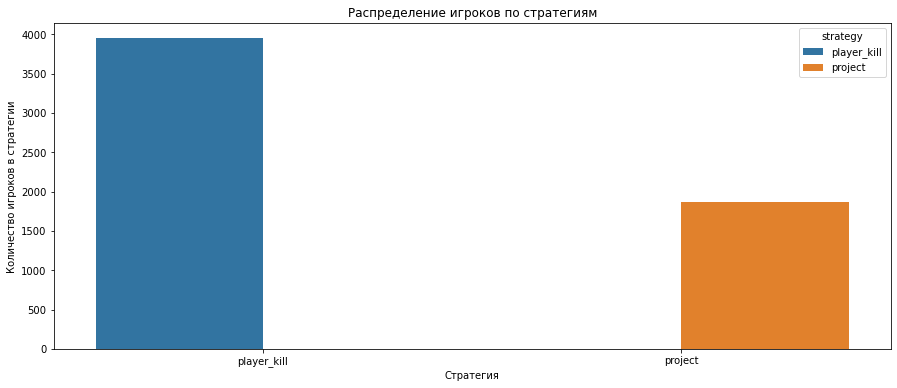

In [55]:
plt.figure(figsize=(15,6))
sns.barplot(data=game_actions.groupby('strategy')[['user_id']].nunique().reset_index()
            , x = 'strategy'
            , y = 'user_id'
            ,hue = 'strategy')
plt.title('Распределение игроков по стратегиям')
plt.ylabel('Количество игроков в стратегии')
plt.xlabel('Стратегия')
plt.show()

Как мы можем заметить, доля игроков, которые решили сделать проект, намного меньше. Учитывая, что реклама будет показываться именно на этапе постройки, это повод задуматься, будет ли она эффективной 

As we can see, the share of players who decided to make a project is much smaller. Considering that advertising will be shown during construction stage, this is a reason to think about whether it will be effective.

**Выявить среднее время, затраченное на прохождение уровня у игроков с разными стратегиями / Find average time spent on finishing the level depending on the strategy**

In [56]:
a = game_actions.groupby('user_id').agg({'event_datetime':'min'}).reset_index()
#определеим время начала и конца для каждого человека, сперва время начала
#find min time for each player

Т.к. игрок вероятно сам решает когда завершить уровень и до или после прохождения и может еще что-то поделать, то максимальное время нужно смотреть строго по срезу finished_stage_1

Since the player decides when to finish level manually, it is important to take into account only those, who have marker finished_stage_1

In [57]:
a = a.merge(game_actions[game_actions['event']=='finished_stage_1'].groupby('user_id')['event_datetime'].max(),
            on='user_id', 
            how ='left')


так мы найдем время прохождения уровня для каждого угрока, т.к. не все игроки закончили уровень, а мне бы хотелось оставить все строки, то я применяю left join, это породит много пропусков, но т.к. их смысл понятен, то это нормально 

We will find datetime of stage finish for every player, since not all of them have finished the stage I expect to see a lot of missings, but this is ok

In [58]:
a.head()

,user_id,event_datetime_x,event_datetime_y
0,0001f83c-c6ac-4621-b7f0-8a28b283ac30,2020-05-06 01:07:00,NaT
1,00151b4f-ba38-44a8-a650-d7cf130a0105,2020-05-06 03:09:00,NaT
2,001aaea6-3d14-43f1-8ca8-7f48820f17aa,2020-05-05 18:08:00,NaT
3,001d39dc-366c-4021-9604-6a3b9ff01e25,2020-05-05 21:02:00,2020-05-12 07:40:00
4,002f508f-67b6-479f-814b-b05f00d4e995,2020-05-05 13:49:00,NaT


In [59]:
a.columns = ['user_id','min_time','max_time']
#сменим имена колонок
#change columns names

In [60]:
a['level_time'] = (a['max_time']-a['min_time']).astype('timedelta64[h]')
#вычислим разницу между событиями в часах
#calculate difference between dates

In [61]:
a.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 13576 entries, 0 to 13575
Data columns (total 4 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   user_id     13576 non-null  object        
 1   min_time    13576 non-null  datetime64[ns]
 2   max_time    5817 non-null   datetime64[ns]
 3   level_time  5817 non-null   float64       
dtypes: datetime64[ns](2), float64(1), object(1)
memory usage: 530.3+ KB


In [62]:
a.head()

,user_id,min_time,max_time,level_time
0,0001f83c-c6ac-4621-b7f0-8a28b283ac30,2020-05-06 01:07:00,NaT,NaN
1,00151b4f-ba38-44a8-a650-d7cf130a0105,2020-05-06 03:09:00,NaT,NaN
2,001aaea6-3d14-43f1-8ca8-7f48820f17aa,2020-05-05 18:08:00,NaT,NaN
3,001d39dc-366c-4021-9604-6a3b9ff01e25,2020-05-05 21:02:00,2020-05-12 07:40:00,154.0
4,002f508f-67b6-479f-814b-b05f00d4e995,2020-05-05 13:49:00,NaT,NaN


In [63]:
game_actions = game_actions.merge(a[['user_id','level_time']], on='user_id',how='left') 
#присоеденим часы
#merge hours

In [64]:
game_actions.head()

,event_datetime,event,building_type,user_id,project_type,date,strategy,level_time
0,2020-05-04,building,assembly_shop,55e92310-cb8e-4754-b622-597e124b03de,NaN,2020-05-04,NaN,NaN
1,2020-05-04,building,assembly_shop,c07b1c10-f477-44dc-81dc-ec82254b1347,NaN,2020-05-04,project,269.0
2,2020-05-04,building,assembly_shop,6edd42cc-e753-4ff6-a947-2107cd560710,NaN,2020-05-04,player_kill,299.0
3,2020-05-04,building,assembly_shop,92c69003-d60a-444a-827f-8cc51bf6bf4c,NaN,2020-05-04,NaN,NaN
4,2020-05-04,building,assembly_shop,cdc6bb92-0ccb-4490-9866-ef142f09139d,NaN,2020-05-04,player_kill,182.0


In [65]:
game_actions[game_actions['event']=='finished_stage_1'].groupby('strategy')[['level_time']].mean().reset_index()

,strategy,level_time
0,player_kill,266.019489
1,project,322.520364


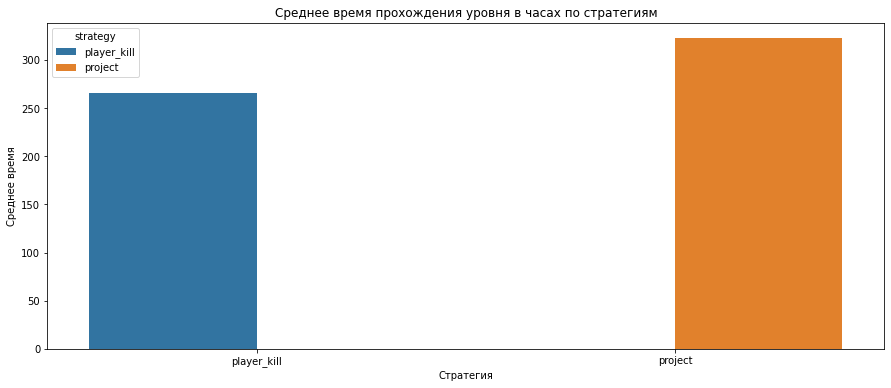

In [66]:
plt.figure(figsize=(15,6))
sns.barplot(data=game_actions[game_actions['event']=='finished_stage_1'].groupby('strategy')[['level_time']].mean().reset_index()
            , x = 'strategy'
            , y = 'level_time'
            ,hue = 'strategy')
plt.title('Среднее время прохождения уровня в часах по стратегиям')
plt.ylabel('Среднее время')
plt.xlabel('Стратегия')
plt.show()

Сделать проект занимает дольше времени, чем убить игрока

The plot above shows average time spent to complete 1st level depending on the strategy, apparently making a project takes longer 

**Определить среднее количество построек каждого типа у игроков с разными стратегиями / Find average buildings count depending on the strategy**

In [67]:
game_actions.head()

,event_datetime,event,building_type,user_id,project_type,date,strategy,level_time
0,2020-05-04,building,assembly_shop,55e92310-cb8e-4754-b622-597e124b03de,NaN,2020-05-04,NaN,NaN
1,2020-05-04,building,assembly_shop,c07b1c10-f477-44dc-81dc-ec82254b1347,NaN,2020-05-04,project,269.0
2,2020-05-04,building,assembly_shop,6edd42cc-e753-4ff6-a947-2107cd560710,NaN,2020-05-04,player_kill,299.0
3,2020-05-04,building,assembly_shop,92c69003-d60a-444a-827f-8cc51bf6bf4c,NaN,2020-05-04,NaN,NaN
4,2020-05-04,building,assembly_shop,cdc6bb92-0ccb-4490-9866-ef142f09139d,NaN,2020-05-04,player_kill,182.0


In [68]:
b = (game_actions.groupby(['strategy','building_type']).agg({'building_type':'count', 'user_id':'nunique'})
                                                              .rename(columns={'building_type':'count'})
                                                              .reset_index()
                                                              )
       
#average number of buildings of each type per player 

In [69]:
b

,strategy,building_type,count,user_id
0,player_kill,assembly_shop,16293,3951
1,player_kill,research_center,3755,2342
2,player_kill,spaceport,17131,3894
3,project,assembly_shop,9113,1866
4,project,research_center,3697,1866
5,project,spaceport,10787,1866


In [70]:
 game_actions.groupby('strategy')[['building_type']].count().reset_index()

,strategy,building_type
0,player_kill,37179
1,project,23597


In [71]:
b= b.merge(game_actions.groupby('strategy')[['building_type']].count()
                                                           .reset_index()
                                                           .rename(columns={'building_type':'total_count'})
                                        , on='strategy')
b
# прицепим также общее количество построек для стратегии

,strategy,building_type,count,user_id,total_count
0,player_kill,assembly_shop,16293,3951,37179
1,player_kill,research_center,3755,2342,37179
2,player_kill,spaceport,17131,3894,37179
3,project,assembly_shop,9113,1866,23597
4,project,research_center,3697,1866,23597
5,project,spaceport,10787,1866,23597


In [72]:
b['avg_number_per_user'] = b['count'] / b['user_id']

In [73]:
b= b.sort_values(by=['strategy','avg_number_per_user'],ascending=False)
b

,strategy,building_type,count,user_id,total_count,avg_number_per_user
5,project,spaceport,10787,1866,23597,5.780815
3,project,assembly_shop,9113,1866,23597,4.883708
4,project,research_center,3697,1866,23597,1.981243
2,player_kill,spaceport,17131,3894,37179,4.399332
0,player_kill,assembly_shop,16293,3951,37179,4.123766
1,player_kill,research_center,3755,2342,37179,1.603330


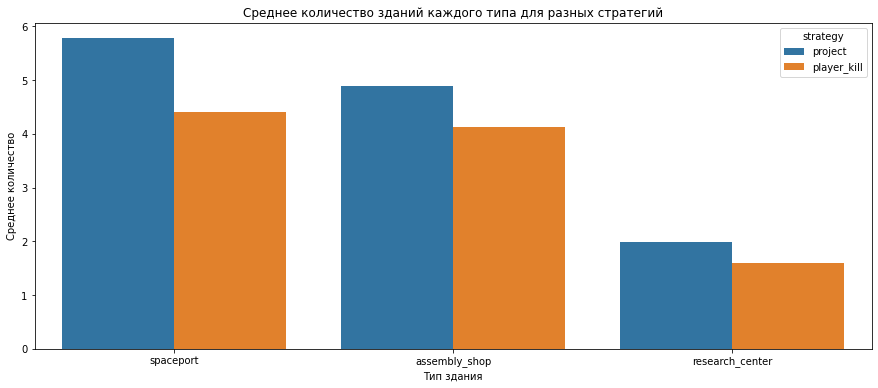

In [74]:
plt.figure(figsize=(15,6))
sns.barplot(data=b, x='building_type', y='avg_number_per_user', hue='strategy')
plt.title('Среднее количество зданий каждого типа для разных стратегий')
plt.ylabel('Среднее количество')
plt.xlabel('Тип здания')
plt.show()

Как видим, проектники строят в среднем больше зданий, чем киллеры.

As demonstrated, project strategy builds more than killers on average 

In [75]:
b['share_bld'] = (b['count'] / b['total_count'])*100
b
#рассчитаем долю каждого типа здания от числа всех построек в стратегии
#calculate share of each building type from total amount of buildings for a strategy 

,strategy,building_type,count,user_id,total_count,avg_number_per_user,share_bld
5,project,spaceport,10787,1866,23597,5.780815,45.713438
3,project,assembly_shop,9113,1866,23597,4.883708,38.619316
4,project,research_center,3697,1866,23597,1.981243,15.667246
2,player_kill,spaceport,17131,3894,37179,4.399332,46.077087
0,player_kill,assembly_shop,16293,3951,37179,4.123766,43.823126
1,player_kill,research_center,3755,2342,37179,1.603330,10.099788


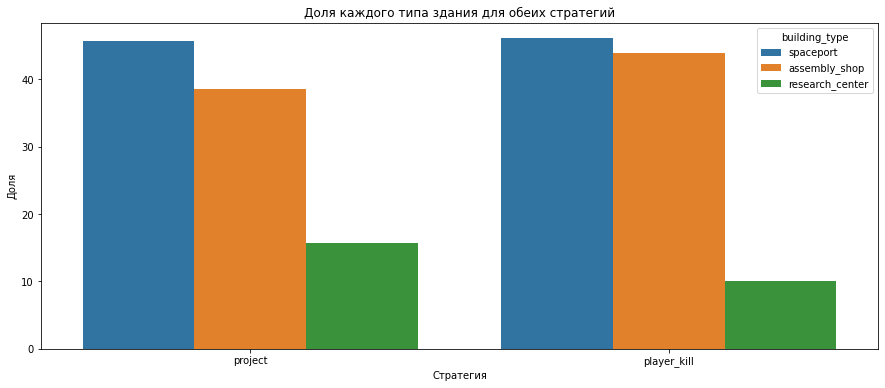

In [76]:
plt.figure(figsize=(15,6))
sns.barplot(data=b, x='strategy', y='share_bld', hue='building_type')
plt.title('Доля каждого типа здания для обеих стратегий')
plt.ylabel('Доля')
plt.xlabel('Стратегия')
plt.show()

Космопорты нужны одинаково всем, а вот исследовательские центры уже более занимают в проектировщиков. Тем не менее, видно, что киллеры тоже их строят, вероятно это важный элемент геймплея. 

Spaceports are wanted equally by everyone, but research centers are more prevalent among project strategy. However, it can be seen that the killers are building them too, this is probably an important element of the gameplay.

**Для игроков, выбравших проект, определить среднее время с момента постройки исследовательского центра до завершения проекта / Find average time between building a research center and finished project for research strategy**

In [77]:
project = game_actions.query('strategy=="project"')
#срез по проекту 
#query by project 

In [78]:
project

,event_datetime,event,building_type,user_id,project_type,date,strategy,level_time
1,2020-05-04 00:00:00,building,assembly_shop,c07b1c10-f477-44dc-81dc-ec82254b1347,NaN,2020-05-04,project,269.0
8,2020-05-04 00:00:00,building,assembly_shop,65a92713-5969-48b1-8945-bfefa5063887,NaN,2020-05-04,project,339.0
9,2020-05-04 00:01:00,building,assembly_shop,fa352362-d258-472c-b295-2796ccc39fa3,NaN,2020-05-04,project,374.0
13,2020-05-04 00:02:00,building,assembly_shop,7b3b6554-7949-4065-9808-d6c79bdc2f58,NaN,2020-05-04,project,280.0
20,2020-05-04 00:03:00,building,assembly_shop,b374304d-2f74-4cc1-a4e2-500da44a06c7,NaN,2020-05-04,project,268.0
...,...,...,...,...,...,...,...,...
135602,2020-06-03 14:41:00,finished_stage_1,NaN,82e46f34-e243-4728-8e20-2e171fc33ea4,NaN,2020-06-03,project,613.0
135609,2020-06-04 05:18:00,building,research_center,d477dde8-7c22-4f23-9c4f-4ec31a1aa4c8,NaN,2020-06-04,project,687.0
135611,2020-06-04 08:03:00,finished_stage_1,NaN,fe032991-71e0-48c5-889f-4c3805ba4c9b,NaN,2020-06-04,project,646.0
135612,2020-06-04 08:29:00,project,NaN,d477dde8-7c22-4f23-9c4f-4ec31a1aa4c8,satellite_orbital_assembly,2020-06-04,project,687.0


In [79]:
c = (project[project['building_type']=='research_center'].groupby('user_id')[['event_datetime']].min()
                                                                                            .reset_index()
                                                                                            .rename(columns={'event_datetime':'research_center_finished'})
    ) 
#определим время первой постройки исследовательского центра
#find the time of first research center building 

In [80]:
c=c.merge(project[project['event']=='project'].groupby('user_id')[['event_datetime']].min()
                                                                            .reset_index()
                                                                            .rename(columns={'event_datetime':'project_finished'}),
on='user_id',
how='left'         
         )
c
#смерджим это с временем финиша первого проекта (если проекты можно делать больше чем 1 раз)
#find the time of first project accomplishment 

,user_id,research_center_finished,project_finished
0,006380d6-67a6-45de-ab1e-6eb54ad8dbe8,2020-05-12 01:22:00,2020-05-16 02:43:00
1,00be7371-fa79-4fbd-b8e7-8ba32e3f8f82,2020-05-18 16:42:00,2020-05-21 00:01:00
2,00c2b9f2-2615-439c-aed0-6974e4c6c1c1,2020-05-22 03:31:00,2020-05-26 13:36:00
3,00de2809-403e-4476-a2f7-ca1b11700190,2020-05-10 11:39:00,2020-05-18 09:33:00
4,00e83261-5fd4-4939-9616-802b5a0202c6,2020-05-14 06:30:00,2020-05-17 09:23:00
...,...,...,...
1861,ff50f63a-c4b3-494e-8bf9-3f19dbfc513e,2020-05-12 11:27:00,2020-05-21 22:14:00
1862,ff60fcd1-4329-494e-b82d-461fbdf5b5eb,2020-05-10 05:12:00,2020-05-10 15:04:00
1863,ff83bdd8-f49a-49fd-8aad-9fa1fb30d516,2020-05-13 17:52:00,2020-05-14 19:28:00
1864,ff841992-d93b-462e-bc6e-18c24a514f36,2020-05-12 00:19:00,2020-05-15 06:49:00


In [81]:
c['time_between'] = (c['project_finished'] - c['research_center_finished']).astype('timedelta64[h]')
#difference 

In [82]:
c

,user_id,research_center_finished,project_finished,time_between
0,006380d6-67a6-45de-ab1e-6eb54ad8dbe8,2020-05-12 01:22:00,2020-05-16 02:43:00,97.0
1,00be7371-fa79-4fbd-b8e7-8ba32e3f8f82,2020-05-18 16:42:00,2020-05-21 00:01:00,55.0
2,00c2b9f2-2615-439c-aed0-6974e4c6c1c1,2020-05-22 03:31:00,2020-05-26 13:36:00,106.0
3,00de2809-403e-4476-a2f7-ca1b11700190,2020-05-10 11:39:00,2020-05-18 09:33:00,189.0
4,00e83261-5fd4-4939-9616-802b5a0202c6,2020-05-14 06:30:00,2020-05-17 09:23:00,74.0
...,...,...,...,...
1861,ff50f63a-c4b3-494e-8bf9-3f19dbfc513e,2020-05-12 11:27:00,2020-05-21 22:14:00,226.0
1862,ff60fcd1-4329-494e-b82d-461fbdf5b5eb,2020-05-10 05:12:00,2020-05-10 15:04:00,9.0
1863,ff83bdd8-f49a-49fd-8aad-9fa1fb30d516,2020-05-13 17:52:00,2020-05-14 19:28:00,25.0
1864,ff841992-d93b-462e-bc6e-18c24a514f36,2020-05-12 00:19:00,2020-05-15 06:49:00,78.0


In [83]:
c['time_between'].mean()

71.35423365487674

Выходит, что на проект люди тратят ~71 час, при том, что в целом на прохождение уровня уходит ~323 часа. Я не знаю много это или нет, но выглядит довольно долго. Если так задумано гейм-дизайнером, то ок, но если нет, возможно стоит посмотреть на чем там люди спотыкаются. 

It appears that people spend 71 hours on average finish the project after they build a research center. I don't know if it is ok in terms of gameplay, but if not, this is a hint to look at what might trouble these people 

In [84]:
project[project['building_type']=='research_center'].groupby('user_id')[['event_datetime']].first()

,event_datetime
user_id,
006380d6-67a6-45de-ab1e-6eb54ad8dbe8,2020-05-12 01:22:00
00be7371-fa79-4fbd-b8e7-8ba32e3f8f82,2020-05-18 16:42:00
00c2b9f2-2615-439c-aed0-6974e4c6c1c1,2020-05-22 03:31:00
00de2809-403e-4476-a2f7-ca1b11700190,2020-05-10 11:39:00
00e83261-5fd4-4939-9616-802b5a0202c6,2020-05-14 06:30:00
...,...
ff50f63a-c4b3-494e-8bf9-3f19dbfc513e,2020-05-12 11:27:00
ff60fcd1-4329-494e-b82d-461fbdf5b5eb,2020-05-10 05:12:00
ff83bdd8-f49a-49fd-8aad-9fa1fb30d516,2020-05-13 17:52:00


In [85]:
project[project['building_type']=='research_center'].groupby('user_id')[['event_datetime']].min()

,event_datetime
user_id,
006380d6-67a6-45de-ab1e-6eb54ad8dbe8,2020-05-12 01:22:00
00be7371-fa79-4fbd-b8e7-8ba32e3f8f82,2020-05-18 16:42:00
00c2b9f2-2615-439c-aed0-6974e4c6c1c1,2020-05-22 03:31:00
00de2809-403e-4476-a2f7-ca1b11700190,2020-05-10 11:39:00
00e83261-5fd4-4939-9616-802b5a0202c6,2020-05-14 06:30:00
...,...
ff50f63a-c4b3-494e-8bf9-3f19dbfc513e,2020-05-12 11:27:00
ff60fcd1-4329-494e-b82d-461fbdf5b5eb,2020-05-10 05:12:00
ff83bdd8-f49a-49fd-8aad-9fa1fb30d516,2020-05-13 17:52:00


**Изучить средние затраты на привлечение в разбивке на источники в день / Find average costs of each source per day**


In [86]:
ad_costs.groupby('source')[['cost']].mean().reset_index()

,source,cost
0,facebook_ads,305.843520
1,instagram_new_adverts,308.777384
2,yandex_direct,319.015921
3,youtube_channel_reklama,152.588458


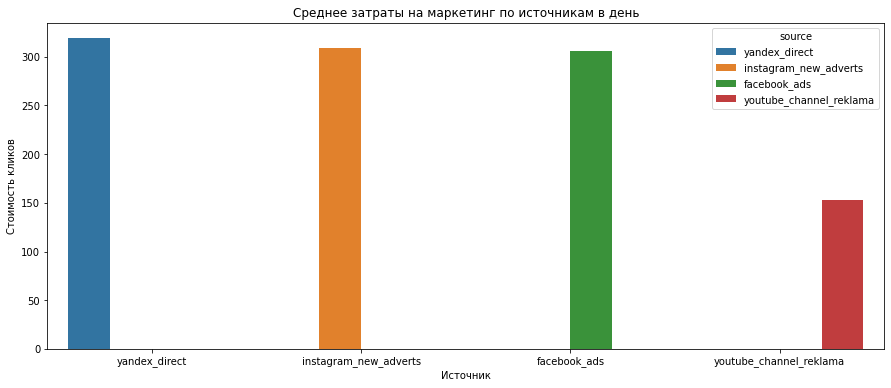

In [87]:
plt.figure(figsize=(15,6))
sns.barplot(data=ad_costs.groupby('source')[['cost']].mean().reset_index().sort_values(by='cost',ascending=False),
           x='source',
           y='cost',
           hue='source')
plt.title('Среднее затраты на маркетинг по источникам в день')
plt.xlabel('Источник')
plt.ylabel('Стоимость кликов')
plt.show()

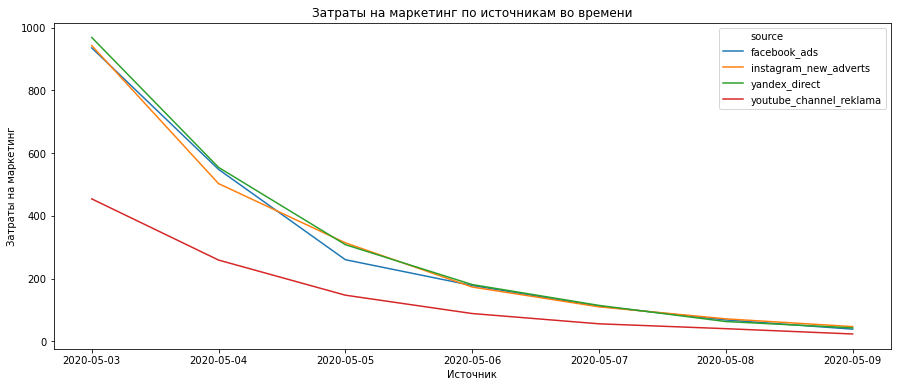

In [88]:
plt.figure(figsize=(15,6))
sns.lineplot(data=ad_costs,
           x='day',
           y='cost',
           hue='source')
plt.title('Затраты на маркетинг по источникам во времени')
plt.xlabel('Источник')
plt.ylabel('Затраты на маркетинг')
plt.show()

Затраты по дням демонстрируют падение, Ютуб сперва является самым выгодным, но ближе к 8 мая остальные почти сравниваются с ним.

YouTube is the least expensive, but after 9th of May costs of other sources become similar 

**Изучить куммулятивные затраты на привлечение в разбивке на источники / Find cummulative ad costs for different sources**

In [89]:
ad_costs

,source,day,cost
0,facebook_ads,2020-05-03,935.882786
1,facebook_ads,2020-05-04,548.354480
2,facebook_ads,2020-05-05,260.185754
3,facebook_ads,2020-05-06,177.982200
4,facebook_ads,2020-05-07,111.766796
5,facebook_ads,2020-05-08,68.009276
6,facebook_ads,2020-05-09,38.723350
7,instagram_new_adverts,2020-05-03,943.204717
8,instagram_new_adverts,2020-05-04,502.925451
9,instagram_new_adverts,2020-05-05,313.970984


In [90]:
ad_costs['cummulative_cost'] = ad_costs.groupby('source').agg({'cost':'cumsum'})
ad_costs

,source,day,cost,cummulative_cost
0,facebook_ads,2020-05-03,935.882786,935.882786
1,facebook_ads,2020-05-04,548.354480,1484.237266
2,facebook_ads,2020-05-05,260.185754,1744.423020
3,facebook_ads,2020-05-06,177.982200,1922.405220
4,facebook_ads,2020-05-07,111.766796,2034.172016
5,facebook_ads,2020-05-08,68.009276,2102.181293
6,facebook_ads,2020-05-09,38.723350,2140.904643
7,instagram_new_adverts,2020-05-03,943.204717,943.204717
8,instagram_new_adverts,2020-05-04,502.925451,1446.130168
9,instagram_new_adverts,2020-05-05,313.970984,1760.101152


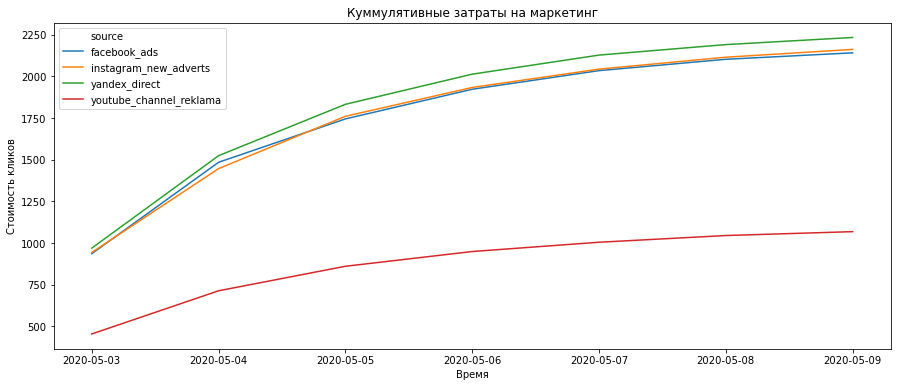

In [91]:
plt.figure(figsize=(15,6))
sns.lineplot(data=ad_costs, x='day', y='cummulative_cost', hue='source')
plt.title('Куммулятивные затраты на маркетинг')
plt.ylabel('Стоимость кликов')
plt.xlabel('Время')
plt.show()

В целом затраты по всем источникам следуют одному тренду, затраты на инстаграмм после 4 мая стали превышать затраты по фейсбуку. 
Самый менее затратный источник ютуб. 

In general, costs for all sources are following the same trend, with Instagram spending after May 4 exceeding Facebook costs.
The cheapest source is YouTube

**Рассчитать САС в разбивке по дням и источниками / Find CAC for different sources for a time period**

In [92]:
ad_costs

,source,day,cost,cummulative_cost
0,facebook_ads,2020-05-03,935.882786,935.882786
1,facebook_ads,2020-05-04,548.354480,1484.237266
2,facebook_ads,2020-05-05,260.185754,1744.423020
3,facebook_ads,2020-05-06,177.982200,1922.405220
4,facebook_ads,2020-05-07,111.766796,2034.172016
5,facebook_ads,2020-05-08,68.009276,2102.181293
6,facebook_ads,2020-05-09,38.723350,2140.904643
7,instagram_new_adverts,2020-05-03,943.204717,943.204717
8,instagram_new_adverts,2020-05-04,502.925451,1446.130168
9,instagram_new_adverts,2020-05-05,313.970984,1760.101152


In [93]:
game_actions = game_actions.merge(user_source, on='user_id', how='inner')

Сейчас нам необходимо высчитать сколько людей было привлечено в каждый день, т.к. у нас довольно короткий период, то лайфтайм будет рассчитываться с детальностью до дня 

Now we have to find out how many people were accquired in a single day, since time period is quite short, the lifetime calculation is detailed at the day level. 

In [94]:
grouped = game_actions.groupby('user_id')[['date']].min().reset_index().rename(columns={'date':'first_day'})
#найдеем первую дату дейтствия для каждого юзера 
#find first action date for each user

In [95]:
grouped.head()

,user_id,first_day
0,0001f83c-c6ac-4621-b7f0-8a28b283ac30,2020-05-06
1,00151b4f-ba38-44a8-a650-d7cf130a0105,2020-05-06
2,001aaea6-3d14-43f1-8ca8-7f48820f17aa,2020-05-05
3,001d39dc-366c-4021-9604-6a3b9ff01e25,2020-05-05
4,002f508f-67b6-479f-814b-b05f00d4e995,2020-05-05


In [96]:
game_actions = game_actions.merge(grouped, on ='user_id', how='left')
#сообщим данные в основной дф
#merge with main df

In [97]:
game_actions['lifetime']  = (game_actions['date'] - game_actions['first_day']) / np.timedelta64(1, 'D')
#определим лайфтайм
#find lifetime

In [98]:
game_actions['lifetime'] = game_actions['lifetime'].round().astype('int')

In [99]:
game_actions.head()

,event_datetime,event,building_type,user_id,project_type,date,strategy,level_time,source,first_day,lifetime
0,2020-05-04 00:00:00,building,assembly_shop,55e92310-cb8e-4754-b622-597e124b03de,NaN,2020-05-04,NaN,NaN,youtube_channel_reklama,2020-05-04,0
1,2020-05-05 05:20:00,building,assembly_shop,55e92310-cb8e-4754-b622-597e124b03de,NaN,2020-05-05,NaN,NaN,youtube_channel_reklama,2020-05-04,1
2,2020-05-05 19:24:00,building,assembly_shop,55e92310-cb8e-4754-b622-597e124b03de,NaN,2020-05-05,NaN,NaN,youtube_channel_reklama,2020-05-04,1
3,2020-05-05 20:59:00,building,assembly_shop,55e92310-cb8e-4754-b622-597e124b03de,NaN,2020-05-05,NaN,NaN,youtube_channel_reklama,2020-05-04,1
4,2020-05-06 00:52:00,building,assembly_shop,55e92310-cb8e-4754-b622-597e124b03de,NaN,2020-05-06,NaN,NaN,youtube_channel_reklama,2020-05-04,2


In [100]:
cohorts = game_actions.groupby(['first_day', 'lifetime']).agg({'user_id':'nunique'}).reset_index()
cohorts.head()


,first_day,lifetime,user_id
0,2020-05-04,0,5860
1,2020-05-04,1,3021
2,2020-05-04,2,3204
3,2020-05-04,3,3412
4,2020-05-04,4,3564


In [101]:
cohorts2 = game_actions.groupby(['first_day','source', 'lifetime']).agg({'user_id':'nunique'}).reset_index()
cohorts2.head()

,first_day,source,lifetime,user_id
0,2020-05-04,facebook_ads,0,1184
1,2020-05-04,facebook_ads,1,634
2,2020-05-04,facebook_ads,2,652
3,2020-05-04,facebook_ads,3,703
4,2020-05-04,facebook_ads,4,717


In [102]:
initial_users = cohorts[cohorts['lifetime']==0][['first_day', 'user_id']].rename(columns={'user_id':'cohort_size'})
initial_users
#размеры когорт 

,first_day,cohort_size
0,2020-05-04,5860
32,2020-05-05,3361
61,2020-05-06,1847
92,2020-05-07,1109
122,2020-05-08,688
149,2020-05-09,440
175,2020-05-10,271


In [103]:
initial_users2= cohorts2[cohorts2['lifetime']==0][['first_day','source','user_id']].rename(columns={'user_id':'cohort_size'})
initial_users2.sort_values(by=['source', 'cohort_size'], ascending=False)
#кол-во привлеченных польователей по источнику и дате.

,first_day,source,cohort_size
88,2020-05-04,youtube_channel_reklama,1146
197,2020-05-05,youtube_channel_reklama,663
304,2020-05-06,youtube_channel_reklama,366
416,2020-05-07,youtube_channel_reklama,220
515,2020-05-08,youtube_channel_reklama,135
606,2020-05-09,youtube_channel_reklama,100
695,2020-05-10,youtube_channel_reklama,56
56,2020-05-04,yandex_direct,2078
169,2020-05-05,yandex_direct,1208
278,2020-05-06,yandex_direct,664


In [104]:
initial_users2['shift'] = -1
#обозначим насколько сместить дату, что подогнать ключи
#define how shifted the day is going to be

In [105]:
initial_users2['first_day2'] = (
    initial_users2['first_day'].values.astype('datetime64[D]') 
    + initial_users2['shift'].values.astype('timedelta64[D]')
)
#сместим дату
#shift the date

In [106]:
initial_users2.head()

,first_day,source,cohort_size,shift,first_day2
0,2020-05-04,facebook_ads,1184,-1,2020-05-03
28,2020-05-04,instagram_new_adverts,1452,-1,2020-05-03
56,2020-05-04,yandex_direct,2078,-1,2020-05-03
88,2020-05-04,youtube_channel_reklama,1146,-1,2020-05-03
114,2020-05-05,facebook_ads,694,-1,2020-05-04


In [107]:
ad_costs['day'] = ad_costs['day'].astype('datetime64[ns]')

In [108]:
cac = ad_costs.merge(initial_users2, left_on=['day','source'], right_on=['first_day2','source'])

In [109]:
cac = cac.drop(['shift','first_day2'], axis=1)
cac

,source,day,cost,cummulative_cost,first_day,cohort_size
0,facebook_ads,2020-05-03,935.882786,935.882786,2020-05-04,1184
1,facebook_ads,2020-05-04,548.354480,1484.237266,2020-05-05,694
2,facebook_ads,2020-05-05,260.185754,1744.423020,2020-05-06,345
3,facebook_ads,2020-05-06,177.982200,1922.405220,2020-05-07,224
4,facebook_ads,2020-05-07,111.766796,2034.172016,2020-05-08,139
5,facebook_ads,2020-05-08,68.009276,2102.181293,2020-05-09,84
6,facebook_ads,2020-05-09,38.723350,2140.904643,2020-05-10,56
7,instagram_new_adverts,2020-05-03,943.204717,943.204717,2020-05-04,1452
8,instagram_new_adverts,2020-05-04,502.925451,1446.130168,2020-05-05,796
9,instagram_new_adverts,2020-05-05,313.970984,1760.101152,2020-05-06,472


Смысл такого присоединения заключается в том, что затраты на игроков на 4 мая сделаны 3 мая, поэтому для расчета САС необходимо учитывать расходы за день до привлечения 

The feature of such merge implies that costs for acqusition for 4th of May were made 3th of May, which means that CAC should consider costs the day before. 

In [110]:
cac['cac'] = cac['cost'] / cac['cohort_size']

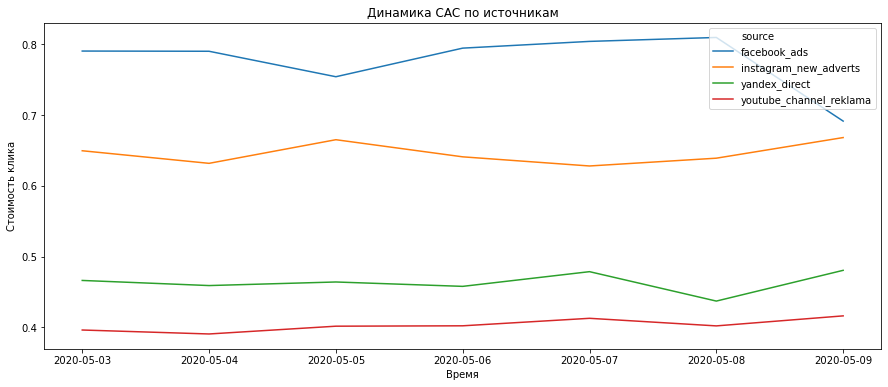

In [111]:
plt.figure(figsize=(15,6))
sns.lineplot(data=cac, x='day', y='cac', hue='source')
plt.title('Динамика CAC по источникам')
plt.ylabel('Стоимость клика')
plt.xlabel('Время')
plt.show()

хмм, пока у всех САС растет к концу периода, у фейсбука он резко падает 

**Рассчитать средний САС по источникам / Find average CAC for different sources**

In [112]:
cac

,source,day,cost,cummulative_cost,first_day,cohort_size,cac
0,facebook_ads,2020-05-03,935.882786,935.882786,2020-05-04,1184,0.790442
1,facebook_ads,2020-05-04,548.354480,1484.237266,2020-05-05,694,0.790136
2,facebook_ads,2020-05-05,260.185754,1744.423020,2020-05-06,345,0.754162
3,facebook_ads,2020-05-06,177.982200,1922.405220,2020-05-07,224,0.794563
4,facebook_ads,2020-05-07,111.766796,2034.172016,2020-05-08,139,0.804078
5,facebook_ads,2020-05-08,68.009276,2102.181293,2020-05-09,84,0.809634
6,facebook_ads,2020-05-09,38.723350,2140.904643,2020-05-10,56,0.691488
7,instagram_new_adverts,2020-05-03,943.204717,943.204717,2020-05-04,1452,0.649590
8,instagram_new_adverts,2020-05-04,502.925451,1446.130168,2020-05-05,796,0.631816
9,instagram_new_adverts,2020-05-05,313.970984,1760.101152,2020-05-06,472,0.665193


In [113]:
mean_cac = cac.groupby(['source']).agg({'cost':'sum','cohort_size':'sum'}).reset_index()

In [114]:
mean_cac['mean_cac'] = mean_cac['cost']/mean_cac['cohort_size']

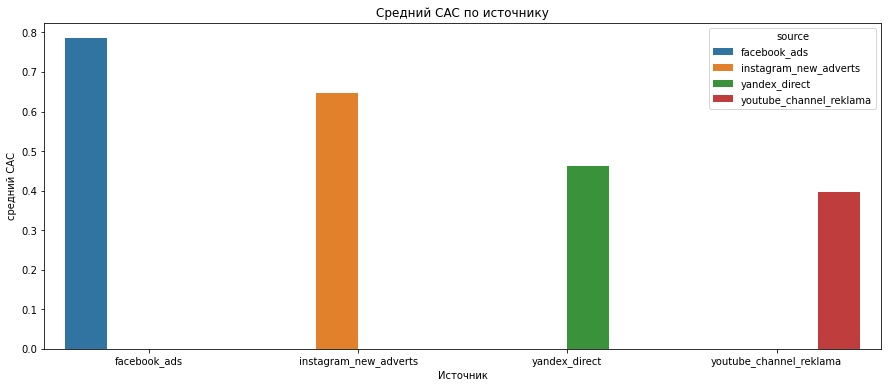

In [115]:
plt.figure(figsize=(15,6))
sns.barplot(data=mean_cac,
           x='source',
           y='mean_cac',
           hue='source')
plt.title('Средний CAC по источнику')
plt.ylabel('средний САС')
plt.xlabel('Источник')
plt.show()

График показывает, что 1 клиент привлекается в среднем за указанное кол-во у.е. денег, т.е. чем меньше показатель, тем лучше. Самый дорогой оказался фейсбук, дешевый ютуб.

The graph shows that 1 customer is acquired on average for displayed amount of money, i.e. the smaller the number, the better. Facebook is the least lucrative, YouTube is the most. 

**Найти Retention Rate по источникам/ Find Retention Rate depending on the source**


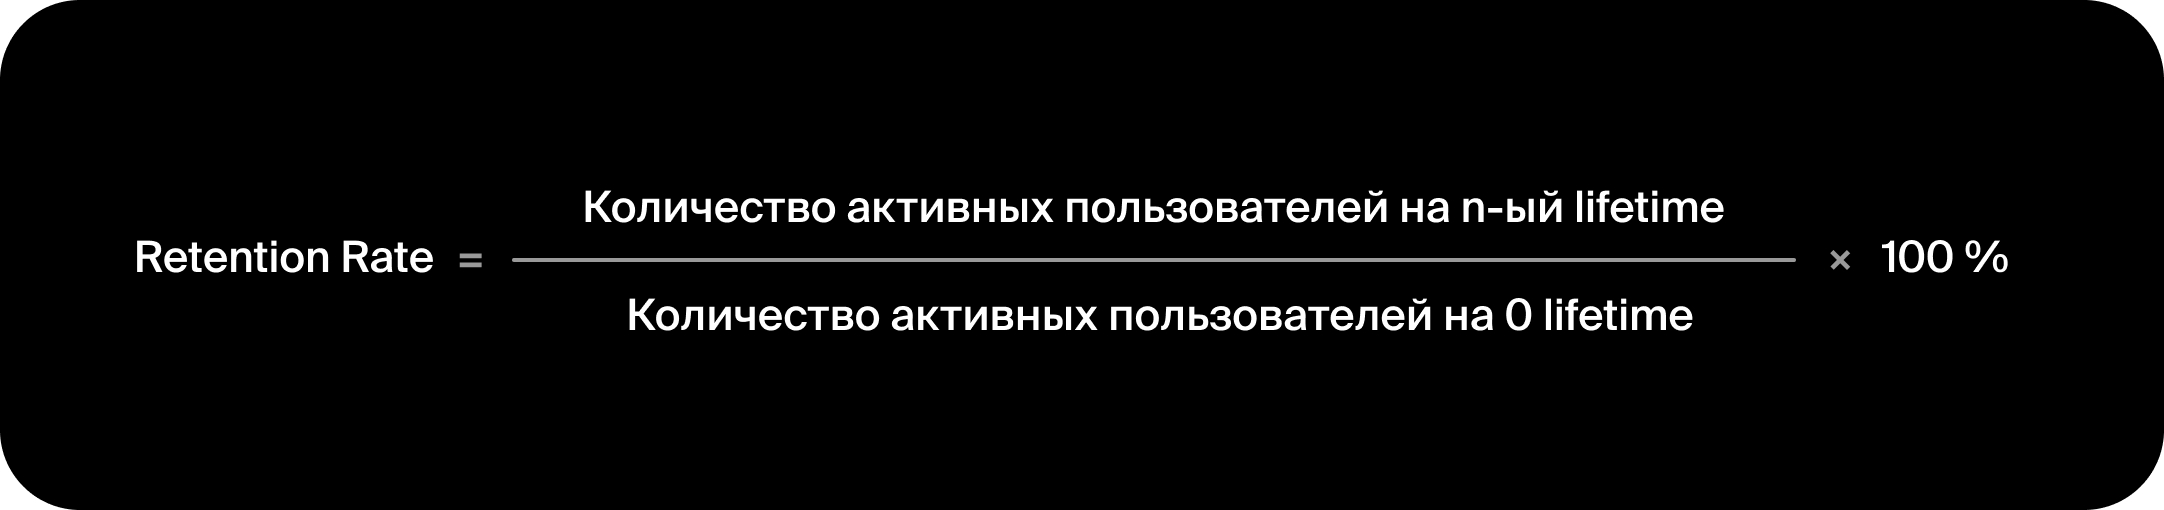


ранее я рассчитывал lifetime по дням, это породило почти 30 лайфтаймов, на карте такое не отобразить, поэтому я решил переделать его с детальностью до недели


earlier I calculated lifetime by days, this gave rise to almost 30 lifetimes, this cannot be displayed on the map, so I decided to redo it with detail up to a week


In [116]:
game_actions.head(2)

,event_datetime,event,building_type,user_id,project_type,date,strategy,level_time,source,first_day,lifetime
0,2020-05-04 00:00:00,building,assembly_shop,55e92310-cb8e-4754-b622-597e124b03de,NaN,2020-05-04,NaN,NaN,youtube_channel_reklama,2020-05-04,0
1,2020-05-05 05:20:00,building,assembly_shop,55e92310-cb8e-4754-b622-597e124b03de,NaN,2020-05-05,NaN,NaN,youtube_channel_reklama,2020-05-04,1


In [117]:
#games = game_actions
#games = games.drop(['lifetime'],axis=1)

In [118]:
#games['date_week'] = games['date'].astype('datetime64[W]')
#games['first_date_week'] = games['first_day'].astype('datetime64[W]')

In [119]:
#games.head(15)

In [120]:
#games['lifetime']  = (games['date_week'] - games['first_date_week']) / np.timedelta64(1, 'W')
#определим лайфтайм
#find lifetime

In [121]:
#games['lifetime'] = games['lifetime'].round().astype('int')

In [122]:
#cohorts3 = games.groupby(['first_day','source', 'lifetime']).agg({'user_id':'nunique'}).reset_index()
#cohorts3.head()

In [123]:
#initial_users3 = cohorts3[cohorts3['lifetime']==0][['first_day','source','user_id']].rename(columns={'user_id':'cohort_size'})
#initial_users3 = initial_users3.sort_values(by=['source', 'cohort_size'], ascending=False)
#initial_users3.head()

In [124]:
cohorts2 = cohorts2.merge(initial_users2, on=['first_day','source'])

In [125]:
cohorts2 = cohorts2.drop(['shift','first_day2'], axis=1)
cohorts2

,first_day,source,lifetime,user_id,cohort_size
0,2020-05-04,facebook_ads,0,1184,1184
1,2020-05-04,facebook_ads,1,634,1184
2,2020-05-04,facebook_ads,2,652,1184
3,2020-05-04,facebook_ads,3,703,1184
4,2020-05-04,facebook_ads,4,717,1184
...,...,...,...,...,...
711,2020-05-10,youtube_channel_reklama,16,3,56
712,2020-05-10,youtube_channel_reklama,17,1,56
713,2020-05-10,youtube_channel_reklama,19,1,56
714,2020-05-10,youtube_channel_reklama,20,2,56


In [126]:
cohorts2['retention'] = cohorts2['user_id'] / cohorts2['cohort_size']

In [127]:
rr_facebook = cohorts2.query('source=="facebook_ads"')
rr_instagram = cohorts2.query('source=="instagram_new_adverts"')
rr_yandex = cohorts2.query('source=="yandex_direct"')
rr_yt = cohorts2.query('source=="youtube_channel_reklama"')

In [128]:
#def output(df):
    # функция берет на вход дф и возрващает сводную таблицу
#    output = df.pivot_table(index = 'first_day', 
#                             columns = 'lifetime', 
#                             values = 'retention', 
#                             aggfunc = 'sum').sort_values(by='first_day', ascending = True)
#    output.loc['mean'] = output.mean()
#    return(output)

In [129]:
#out_fb = output(rr_facebook)
#out_inst = output(rr_instagram)
#out_ya = output(rr_yandex)
#out_yt = output(rr_yt)

In [130]:
def plot(df, name, st_lifetime, end_lifetime):
    #функция берет на вход дф, имя графика, левую границу лайфтайм и правую границу лайфтайма
    #так мы можем сами выбрать промежуток 
    df = df[(df['lifetime']>=st_lifetime)&(df['lifetime']<=end_lifetime)]
    output = df.pivot_table(index = 'first_day', 
                             columns = 'lifetime', 
                             values = 'retention', 
                             aggfunc = 'sum').sort_values(by='first_day', ascending = True)
    output.loc['mean'] = output.mean()
    
    
    sns.set(style = 'whitegrid')
    plt.figure(figsize = (15, 9))
    plt.title('Retention rate для '+name, fontsize = 16)
    ax = sns.heatmap(output, annot=True, fmt='.2%', linewidths=1, linecolor='gray', vmin=0, vmax=0)
    plt.ylabel('Номер когорты')
    plt.xlabel('Лайфтайм')
    #ax.set_yticklabels(rr.index.date)
    
    plt.show()


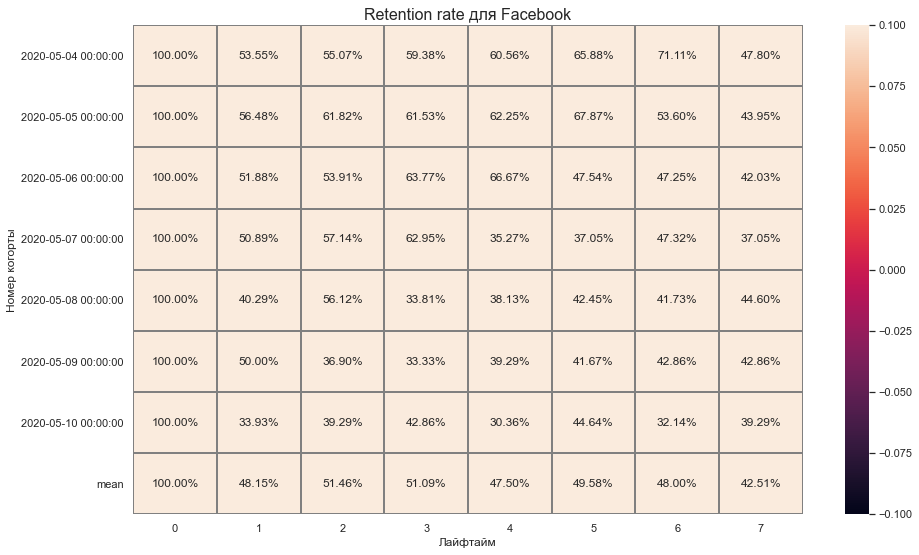

In [131]:
plot(rr_facebook, 'Facebook',0,7)

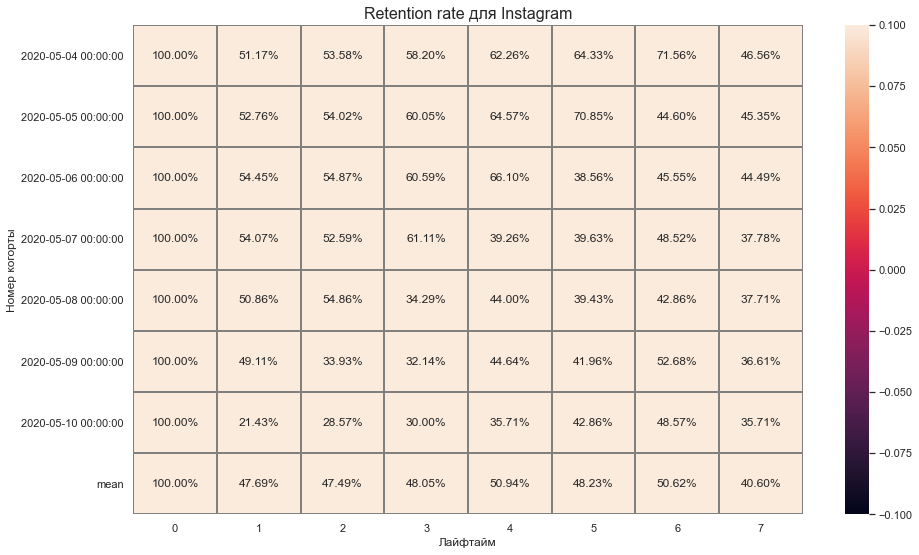

In [132]:
plot(rr_instagram, 'Instagram', 0,7)

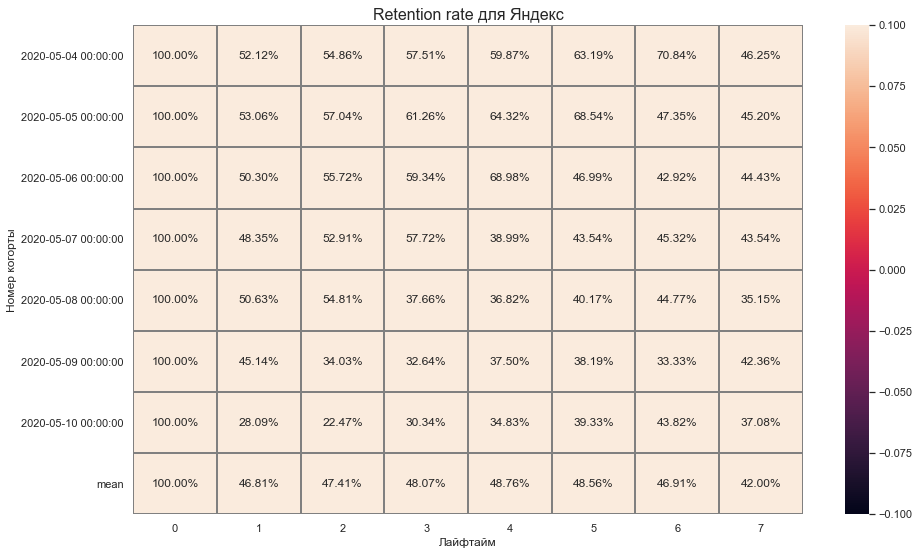

In [133]:
plot(rr_yandex, 'Яндекс',0,7)

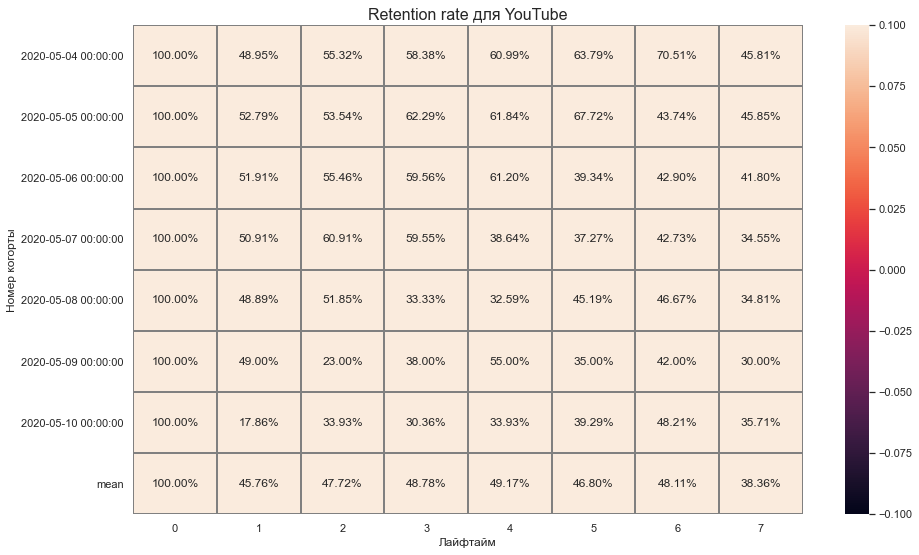

In [134]:
plot(rr_yt, 'YouTube',0, 7)

# Общие выводы
Подводя некий итог, можно сказать, что в целом игроки не особо то отличаются в своих паттернах по источнику, при этом глобально наибольшие различия достигаются при разделении на стратегии. 
Проектировщики очевидно строят больше зданий и дольше тратят на прохождение уровня. Далее мы проведем экстрополяцию данных на ген.совокупность. 

Анализируя затраты можно сделать вывод, что фейсбук наиболее затратный, в то время как ютуб наиболее выгодный. При этом чтобы оценить эффективность маркетинговых затрат было бы неплохо иметь данные о доходах, так мы бы смогли рассчитать ROMI и сделать окончательный вердикт. А пока, судя по абсолютному значению привлеченных людей и САС, можно сказать, что фейсбук наименее выгодный источник. 

Касательно Retention Rate, самый сильный скачок вниз наблюдается на 2 день, т.е. почти 50% людей начинают и бросают на 2 день, а далее удержание падает уже медленней. При этом, что-то странное произошло в когорте 4 мая на 6 лайфтайм...

# Conclusions 


To summarize, we can say that, in general, the players do not really differ in their patterns by source, while globally the greatest differences are achieved when dividing into strategies.
Designers obviously build more buildings and take longer to complete a level. Next, we will extrapolate the data to the population.

Analyzing the costs, we can conclude that Facebook is the most expensive, while YouTube is the most profitable. At the same time, in order to assess the effectiveness of marketing costs, it would be nice to have data on income, so we could calculate ROMI and make the final verdict. In the meantime, judging by the absolute value of attracted people and CACs, we can say that Facebook is the least profitable source.

Regarding the Retention Rate, the strongest downward jump is observed on day 2, i.e. almost 50% of people start and quit on day 2, and then retention falls more slowly. At the same time, something strange happened in the cohort on May 4 at 6 lighttime ...

**Задача 1** / **Task 1**
- Определить поведенческие паттерны игроков с разными стратегиями в разбивке по источнику прихода( т.е. для каждого источника проанализировать поведение каждой из стратегий,т.е. повторить шаги EDA анализа) / Define behevioral patterns of players with different play styles 
- Выводы, интерпретация / Conclusions

- Выявить количество игроков, выбравших тот инли иной путь прохождения в разбивке по источнику / Determine players with different play strategies depending on the source
- Выявить среднее время, затраченное на прохождение уровня у игроков с разными стратегиями в разбивке по источнику / Find average time spent on finishing the level depending on the source
- Определить среднее количество построек каждого типа у игроков в разбивке по источнику / Find average buildings count depending on the source

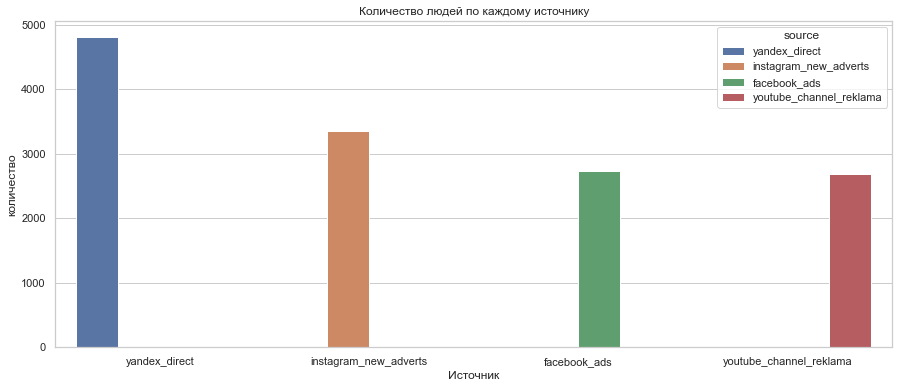

In [135]:
#для начала посмотрим сколько у нас вообще людей из каждого источника
plt.figure(figsize=(15,6))

sns.barplot(data = user_source.groupby('source')[['user_id']].nunique().reset_index().sort_values(by='user_id',ascending=False),
            y='user_id',
            x='source',
            hue='source')
plt.title('Количество людей по каждому источнику')
plt.ylabel('количество')
plt.xlabel('Источник')
plt.show()

**Выявить количество игроков, выбравших тот инли иной путь прохождения в разбивке по источнику / Determine players with different play strategies depending on the source**

In [136]:
d = game_actions.groupby(['strategy','source']).agg({'user_id':'nunique'}).reset_index().sort_values(by='user_id',ascending=False)
#здесь мы ищем людей в разбивке по стратегии и источнику
#here we find players grouped by strategy and source

In [137]:
d= (d.merge(user_source.groupby('source')[['user_id']].nunique().reset_index().sort_values(by='user_id',ascending=False), 
           on='source')
     .rename(columns={'user_id_x':'count','user_id_y':'total_count'})
)
# а здесь мерджим общее кол-во людей по каждому источнику
#and here we merge total amount of palyers on the source group

In [138]:
d['share'] = (d['count']/d['total_count'])*100
#proportion

In [139]:
d

,strategy,source,count,total_count,share
0,player_kill,yandex_direct,1422,4817,29.520448
1,project,yandex_direct,620,4817,12.871082
2,player_kill,instagram_new_adverts,990,3347,29.578727
3,project,instagram_new_adverts,476,3347,14.221691
4,player_kill,youtube_channel_reklama,780,2686,29.039464
5,project,youtube_channel_reklama,379,2686,14.110201
6,player_kill,facebook_ads,759,2726,27.842993
7,project,facebook_ads,391,2726,14.343360


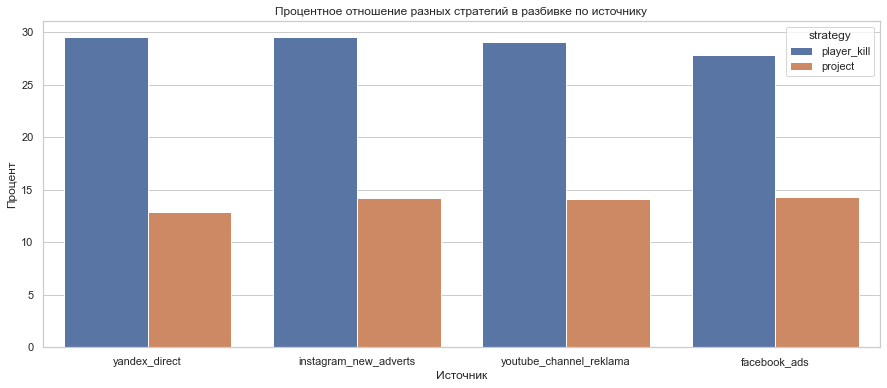

In [140]:
plt.figure(figsize=(15,6))
sns.barplot(data=d,
            y='share',
            x='source',
            hue='strategy'
           )
plt.title('Процентное отношение разных стратегий в разбивке по источнику')
plt.ylabel('Процент')
plt.xlabel('Источник')
plt.show()

Нельзя сказать, что какой-то источник сильно выделяется 

**Выявить среднее время, затраченное на прохождение уровня у игроков с разными стратегиями в разбивке по источнику / Find average time spent on finishing the level depending on the source**

In [141]:
game_actions.head()

,event_datetime,event,building_type,user_id,project_type,date,strategy,level_time,source,first_day,lifetime
0,2020-05-04 00:00:00,building,assembly_shop,55e92310-cb8e-4754-b622-597e124b03de,NaN,2020-05-04,NaN,NaN,youtube_channel_reklama,2020-05-04,0
1,2020-05-05 05:20:00,building,assembly_shop,55e92310-cb8e-4754-b622-597e124b03de,NaN,2020-05-05,NaN,NaN,youtube_channel_reklama,2020-05-04,1
2,2020-05-05 19:24:00,building,assembly_shop,55e92310-cb8e-4754-b622-597e124b03de,NaN,2020-05-05,NaN,NaN,youtube_channel_reklama,2020-05-04,1
3,2020-05-05 20:59:00,building,assembly_shop,55e92310-cb8e-4754-b622-597e124b03de,NaN,2020-05-05,NaN,NaN,youtube_channel_reklama,2020-05-04,1
4,2020-05-06 00:52:00,building,assembly_shop,55e92310-cb8e-4754-b622-597e124b03de,NaN,2020-05-06,NaN,NaN,youtube_channel_reklama,2020-05-04,2


In [142]:
level_time = game_actions[~game_actions.level_time.isna()]

In [143]:
level_time = level_time.groupby('user_id')[['level_time','source']].min().reset_index()

In [144]:
level_time.groupby('source')['level_time'].mean()

source
facebook_ads               284.103478
instagram_new_adverts      284.986357
yandex_direct              282.909892
youtube_channel_reklama    285.293356
Name: level_time, dtype: float64

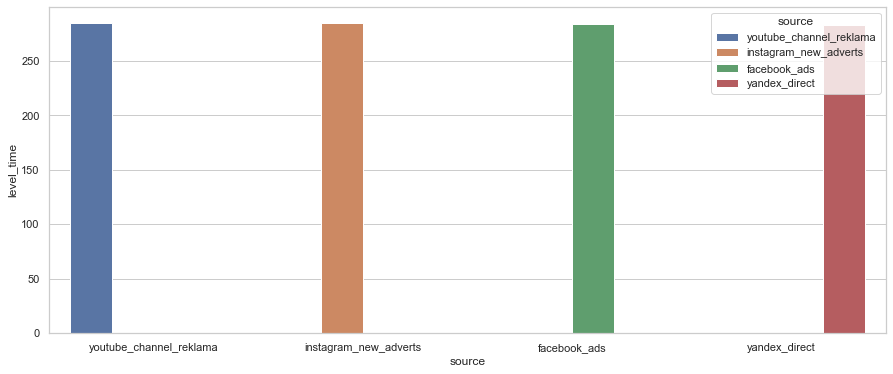

In [145]:
plt.figure(figsize=(15,6))
sns.barplot(data=level_time.groupby('source')[['level_time']].mean().reset_index().sort_values(by='level_time',ascending=False),
            y='level_time',
            x='source',
            hue='source'
           )
plt.show()

Ну да, похоже здесь тоже нет ничего необычного

All seems to usual here as well

**Определить среднее количество построек каждого типа у игроков в разбивке по источнику / Find average buildings count depending on the source**

In [146]:
e = game_actions.groupby(['source','building_type']).agg({'user_id':['count','nunique']}).reset_index()

In [147]:
e.columns = ['source','building_type','count','user_count']
e['avg_bld_per_user'] = e['count'] / e['user_count']

In [148]:
e = e.sort_values(by=['source','avg_bld_per_user'], ascending=False)

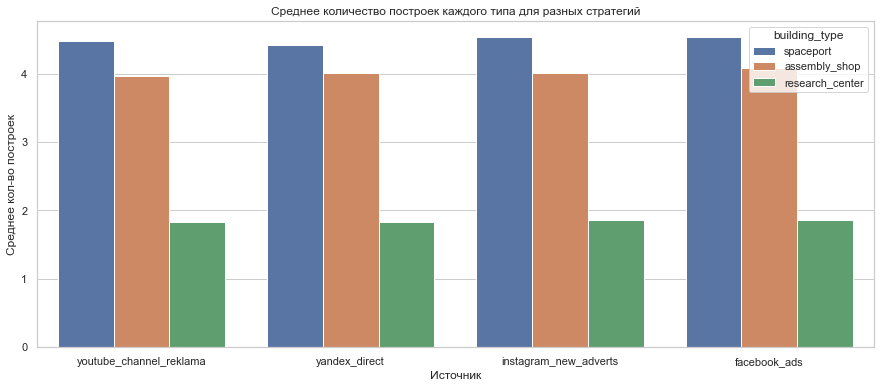

In [149]:
plt.figure(figsize=(15,6))
sns.barplot(data=e,
           x='source',
           y='avg_bld_per_user',
           hue='building_type')
plt.title('Среднее количество построек каждого типа для разных стратегий')
plt.ylabel('Среднее кол-во построек')
plt.xlabel('Источник')
plt.show()

Исходя изполученных данных, можно сделать вывод, что вероятно источник никак не влияет на то, как человек будет играть. Паттерны практически идентичны во всех группах

**Задача 2** / **Task 2**
- Сравнить статистическим критерием среднее время прохождение уровня у разных стратегий / Test average time spent to finish a level for different strategies 
- Выводы, интерпретация / Conclusions

In [150]:
game_actions.head()

,event_datetime,event,building_type,user_id,project_type,date,strategy,level_time,source,first_day,lifetime
0,2020-05-04 00:00:00,building,assembly_shop,55e92310-cb8e-4754-b622-597e124b03de,NaN,2020-05-04,NaN,NaN,youtube_channel_reklama,2020-05-04,0
1,2020-05-05 05:20:00,building,assembly_shop,55e92310-cb8e-4754-b622-597e124b03de,NaN,2020-05-05,NaN,NaN,youtube_channel_reklama,2020-05-04,1
2,2020-05-05 19:24:00,building,assembly_shop,55e92310-cb8e-4754-b622-597e124b03de,NaN,2020-05-05,NaN,NaN,youtube_channel_reklama,2020-05-04,1
3,2020-05-05 20:59:00,building,assembly_shop,55e92310-cb8e-4754-b622-597e124b03de,NaN,2020-05-05,NaN,NaN,youtube_channel_reklama,2020-05-04,1
4,2020-05-06 00:52:00,building,assembly_shop,55e92310-cb8e-4754-b622-597e124b03de,NaN,2020-05-06,NaN,NaN,youtube_channel_reklama,2020-05-04,2


Т.к. я сохранил все строки, нужно снова сгруппировать по юзерам, чтобы выловить время прохождения для каждого игрока

In [151]:
level_time = game_actions[~game_actions.level_time.isna()]
level_time = level_time.groupby('user_id')[['strategy','level_time']].min().reset_index()

In [152]:
level_time
#это данные по стратегии и времени прохождению для тех, кто прошел уровень

,user_id,strategy,level_time
0,001d39dc-366c-4021-9604-6a3b9ff01e25,player_kill,154.0
1,003ee7e8-6356-4286-a715-62f22a18d2a1,player_kill,301.0
2,004074f8-251a-4776-922c-8348dca1a2f6,player_kill,306.0
3,00464e5e-28ed-4be6-bf44-517ef7b3937b,player_kill,271.0
4,0056c007-c082-43cc-bdef-afc49bca4cb9,player_kill,145.0
...,...,...,...
5812,ffd002f3-3545-423e-8dba-0c6a2d48a3aa,player_kill,309.0
5813,ffe810f4-1a1f-464b-924d-6f120b0cb8df,player_kill,320.0
5814,ffef4fed-164c-40e1-bde1-3980f76d0fb5,player_kill,188.0
5815,fffb626c-5ab6-47c9-8113-2062a2f18494,player_kill,202.0


In [153]:
kill_time=level_time[level_time['strategy']=='player_kill']['level_time']
project_time=level_time[level_time['strategy']=='project']['level_time']

In [154]:
kill_time

0       154.0
1       301.0
2       306.0
3       271.0
4       145.0
        ...  
5811    272.0
5812    309.0
5813    320.0
5814    188.0
5815    202.0
Name: level_time, Length: 3951, dtype: float64

**Тест Левеня/ Levene Test**

H0: Дисперсии часов прохождения уровня между группами равны

H1: Дисперсии часов прохождения уровня между группами не равны


In [155]:
lev_test = levene(project_time, kill_time)

In [156]:
alpha = 0.05
if lev_test.pvalue < alpha:
    print('Нулевая гипотеза отвергается в пользу альтернативной о неравенстве дисперсий')
else: 
    print('Нет оснований отвергнуть нулевую гипотезу')


Нулевая гипотеза отвергается в пользу альтернативной о неравенстве дисперсий


**Тест Шапиро/ Shapiro Test**

H0: Время прохождения распределено нормально

H1:  Время прохождения распределено не нормально


In [157]:
shap_t = shapiro(level_time['level_time'])

In [158]:
alpha = 0.05
if shap_t[1] < alpha:
    print('Нулевая гипотеза отвергается в пользу альтернативной о ненормальности распределения')
else: 
    print('Нет оснований отвергнуть нулевую гипотезу')

Нулевая гипотеза отвергается в пользу альтернативной о ненормальности распределения


In [159]:
shap_t 

ShapiroResult(statistic=0.9875602722167969, pvalue=3.073286218851303e-22)

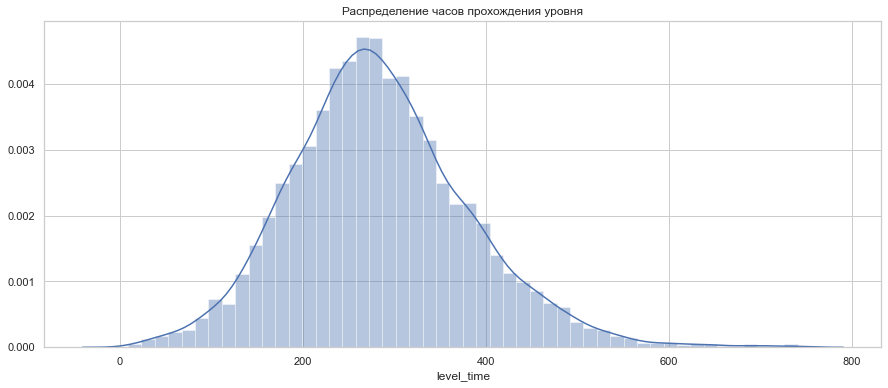

In [160]:
plt.figure(figsize=(15,6))
sns.distplot(level_time['level_time'])
plt.title('Распределение часов прохождения уровня')
plt.show()

Однако...распределение выглядит почти нормальным.
мне кажется в данном случае лучше верить гистограмме, тем более что сам Шапиро пишет, что для наблюдений больше 5к p-value может быть неточным. 

However, distribution looks quite normal to me, considering that Shapiro test reports that above 5k observations p-value might be inaccurate. 

Мне кажется здесь применим т-тест 

I believe we can use t-test here

H0: Среднее количество часов на прохождение уровня не отличается 

Н1: Среднее количество часов на прохождение уровня отличается 

In [161]:
t_test = ttest_ind(project_time,kill_time, equal_var = False, alternative='two-sided')

In [162]:
alpha = 0.05
print('p_value', t_test.pvalue)
print('Project mean:', project_time.mean())
print('Kill mean: ', kill_time.mean())
if t_test.pvalue < alpha:
    print('Нулевая гипотеза отвергается в пользу альтернативной о неравенстве средних часов на прохождение уровня')
else: 
    print('Нет оснований отвергнуть нулевую гипотезу')


p_value 6.037207605865541e-107
Project mean: 322.5203644158628
Kill mean:  266.0194887370286
Нулевая гипотеза отвергается в пользу альтернативной о неравенстве средних часов на прохождение уровня


Таким образом, на уровне доверительной вероятности 95% мы можем утверждать, что среднее время прохождения уровня отличается между группами, которые выбрали разные стратегии. Те, кто выбирает проект, проходят уровень в среднем на 60 часов дольше

Thus, at the 95% confidence level, we can assert that the average time to pass the level differs between the groups that have chosen different strategies. Those who choose a project complete the level on average 60 hours longer

**Задача 3 /Task 3**
- Предположение: Доля тех, кто выбирает проект, отличается между группами игроков привлеченными с разных источников
Сравнить z-критерием доли игрокок, выбравших сценарий убийства другого игрока, в группах, привлеченных черех через каждый из источников / Test proportions of researches for different sources 
- Выводы, интерпретация / Conclusions 

Т.к. мы не увидели какого-либо различия между группами, я решил сфокусироваться только на одной паре, где на выборочных данных мы видим наибольший потенциал для различий - доля проектировщиков, привлеченных черех Яндекс и Facebook.

Since we haven't found any differences between players from different source, I suggest that we focus on one comparison - project users from Yandex and Facebook

In [163]:
d

,strategy,source,count,total_count,share
0,player_kill,yandex_direct,1422,4817,29.520448
1,project,yandex_direct,620,4817,12.871082
2,player_kill,instagram_new_adverts,990,3347,29.578727
3,project,instagram_new_adverts,476,3347,14.221691
4,player_kill,youtube_channel_reklama,780,2686,29.039464
5,project,youtube_channel_reklama,379,2686,14.110201
6,player_kill,facebook_ads,759,2726,27.842993
7,project,facebook_ads,391,2726,14.343360


In [164]:
third = d[((d['source']=='yandex_direct')|(d['source']=='facebook_ads'))&(d['strategy']=='project')]
third

,strategy,source,count,total_count,share
1,project,yandex_direct,620,4817,12.871082
7,project,facebook_ads,391,2726,14.343360


**Z-test**

In [165]:
count = third['count']
count

1    620
7    391
Name: count, dtype: int64

In [166]:
nobs = third['total_count']
nobs

1    4817
7    2726
Name: total_count, dtype: int64

Н0: Доля проектировщиков в обеих группах равна 

Н1: Доля проектировщиков в обеих группах не равна 

In [167]:
z_test = proportions_ztest(count, nobs, alternative='two-sided')

In [168]:
alpha = 0.05
print('p_value', z_test[1])
print('Yandex: ', third[third['source']=='yandex_direct'][['share']])
print('Facebook: ', third[third['source']=='facebook_ads'][['share']])
if z_test[1] < alpha:
    print('Нулевая гипотеза отвергается в пользу альтернативной о неравенстве долей проектировщиков в группах')
else: 
    print('Нет оснований отвергнуть нулевую гипотезу')

p_value 0.07137587676312485
Yandex:         share
1  12.871082
Facebook:        share
7  14.34336
Нет оснований отвергнуть нулевую гипотезу


Таким образом, на уровне доверительной вероятности 95% мы можем утверждать, что доли проектировщиков привлеченных с Яндекса и Фейсбука не отличаются. 

Thus, at the 95% confidence level, we can assert that shares of project strategies obtained from Yandex and Facebook are not statistically different.

# Выводы 

### 1. Выводы по EDA анализу и 1 задаче
Основное различие в поведении игроков кроется в том, какие стратегии они выбирают. Люди, занимающиеся проектами, строят больше, сидят в игре дольше (тут имеется ввиду в рамках 1 уровня). При этом никакие паттерны по источнику не вырисовываются. В этом смысле таргетировать как-то людей из разных источников не имеет смысла. Общий тренд активности показывает, что в течении временного промежутка все меньше людей приходили в игру. Вероятно это напрямую связано с тем, что и расходы на продвижение у нас падали, т.е. меньше рекламировалась, меньше людей приобреталось. При это на 2 день удерживалось чуть больше половины привлеченных ранее людей, как по мне показатель довольно стремный. При этом из тех, что остались, удержание было относительно неплохим. Вероятно стоит сделать упор на том, чтобы удержать человека на 2 лайфтайм (как делают некоторые игры, например, дают бесплатный премиум на неделю+игровой контент, что как по мне хорошая тактика, т.е. человек раскрывает больше геймплейных фишек прежде чем перейти к гринду) 

Затраты наиболее всего неээфективны с источника Фейсбук, т.к. у него наиболее высокий САС. Ютуб же напротив наиболее выгодны по этому показателю. Как я уже говорил ранее, что если бы были еще данные по доходам с игрока(то, сколько он донатит в игре), то мы бы могли увидеть ROMI и возможно тогда бы Фейсбук мог показать, что он не так плох (но как мне кажется и паттерны по тратам по источникам тоже не отличаются). 

### 2. 2 задача
Как было показано, на 95% уровне вероятности паттерн сохраняется и в ген. совокупности, что позволяет нам предполагать, что проектировщики действительно тратят больше времени на прохождение уровня. Это особенно важный инсайт, т.к. мы предполагаем, что монетизация будет работать через показы рекламы на этапе строительства. Учитывая, что строителей меньшинство, а строят они чаще и времени в игре проводят дольше, то нам нужно бустить их количество в игре. Т.е. делать постройку проекта более привлекательной (или такой же привлекательной), как ПВП. 
### 3. 3 задача
Причина, по которой я провел только 1 сравнение, это то, что именно между указанными группами могло вознкнуть потенциально различие. 
Как мы видим, доли стратегий не отличаются между группами, т.е. еще раз подвердилось мнение, что отдельно таргетировать людей из какого-либо источника не имеет смысла. 


### Общая рекомендация 

Необходимо бустить присутствие проектировщиков в игре, не сломав при этом баланс игры. Вероятно, это задел на будущий А/Б тест, для того, чтобы понять как минорные правки в геймплей влияют на распределение стратегий. 

Также, учитывая сколько у нас игроков киллеров, то я бы также подумал как их можно монетизировать. 

Также, нужно что-то делать с удержанием в игре, как видим показатель не очень впечатляющий, со временем также стоит оптимизировать расходы на продвижение. 


### 1. Conclusions on EDA analysis and 1 task
The main difference in player behavior lies in the strategies they choose. People involved in projects build more, stay in the game longer (within 1st level). At the same time, no patterns emerge from the source. In this sense, it makes no sense to target people from different sources somehow. The general trend of activity shows that during the time period fewer and fewer people came into the game. Probably this is directly related to the fact that the costs of promotion were falling in our country, i.e. less advertised, fewer people purchased. At the same time, a little more than half of the previously attracted people were retained for 2 days, as for me the indicator is pretty dumb. At the same time, of those that remained, retention was relatively good. Probably it is worth focusing on keeping a person at 2 lighttime (as some games do, for example, they give a free premium for a week + game content, which, in my opinion, is a good tactic, i.e. a person reveals more gameplay tricks before moving on to grindu)

Costs are most ineffective from a Facebook source, because he has the highest CAC. YouTube, on the other hand, is the most profitable in terms of this indicator. As I said earlier, if there were more data on income from a player (how much he donates in the game), then we could see ROMI and perhaps then Facebook could show that he is not so bad (but it seems to me and patterns of spending by source do not differ either).

### 2.2 task
As has been shown, at a 95% probability level, the pattern persists in the population, which allows us to assume that the designers do spend more time completing the level. This is a particularly important insight because we assume that monetization will work through ad impressions during the construction phase. Considering that the builders are in the minority, but they build more often and spend longer time in the game, then we need to increase their number in the game. Those. make building a project more attractive (or as attractive) as a PVP.
### 3.3 task
The reason I only made 1 comparison is because it is between these groups that a potential difference could arise.
As we can see, the shares of strategies do not differ between groups, i.e. once again confirmed the opinion that it makes no sense to separately target people from any source.


### General recommendation

It is necessary to boost the presence of designers in the game without breaking the balance of the game. This is probably the groundwork for a future A / B test, in order to understand how minor edits to the gameplay affect the distribution of strategies.

Also, given how many killer players we have, I would also think about how they can be monetized.

Also, you need to do something about retention in the game, as you can see, the indicator is not very impressive, over time it is also worth optimizing the promotion costs.
